<a id="Import"></a>
# <p style="background-color: #0093af; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Heart Disease Detection Model</p>

# <font size= '6' color='DodgerBlue'>▶ Table Of Contents</font>

* [1. Importing Libraries](#1)
* [2. Load & Understand the dataset](#2)
* [3. Handling Missing Values](#3)
* [4. Handling Outliers](#4)
* [5. Splitting The Dataset](#5)
* [6. Feature Scaling](#6)
* [7. Training our Machine Learning Model](#7)
* [8. Models Test Scores & Evaluation](#8)

<a id="1"></a>
# <font size= '6' color='DodgerBlue'>▶ Importing Libraries</font>

In [1]:
# Data Science Tools
import numpy as np
import pandas as pd

# Data Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import sweetviz as sv
import time

# Scikit-Learn Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Warnings
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# <font size= '6' color='DodgerBlue'>▶ Load & Understand The Dataset</font>

In [2]:
Data = pd.read_csv("Heart_Disease_Dataset.csv")

# Comma-Separated Values (CSV)
# Age  ,  Name     ,  Target
# 21   ,  John     ,   200
# 22   ,  Sara     ,   500
# 23   ,  Olivia   ,   700

In [3]:
Data.shape # Dimensions (rows, columns) "Attribute"

(1025, 14)

In [4]:
Data.head(10) # first 10 rows/records  "Method"

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

### **Each of the attributes:**

* age: Age in years
* sex: Sex(1= male, 0= female)
* cp: Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value3: non-aginal pain, Value 4: asymptomatic)
* trestbps: Resting blood pressure (in mmHg on admission to the hospital)
* chol: Serum Cholestoral in mg/dl
* fbs: fast blood sugar > 120 mg/dl (1= true, 0=false)
* restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or St elevation or depression of > 0.05mV, 2: showing probabal or definite left ventricular hypertrophy by Estes'criteria)
* thalach: Maximum heart rate achieved
* exang: Excercise included angina (1= yes, 0=no)
* oldpeak: ST depression indced by exercise relative to rest
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca : Number of major vessels (0-3) colored by flourosopy
* thal: 3= normal, 6= fixed defect, 7= reversable defect
* target: Diagnosis of heart disease- angiprahic disease status
Value 0: <50% diameter narrowing,
Value 1: > 50% diameter narrowing

In [5]:
Data.tail(10) # last 10 rows/records  "Method"

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1015   58    1   0       128   216    0        0      131      1      2.2   
1016   65    1   3       138   282    1        0      174      0      1.4   
1017   53    1   0       123   282    0        1       95      1      2.0   
1018   41    1   0       110   172    0        0      158      0      0.0   
1019   47    1   0       112   204    0        1      143      0      0.1   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1015      1   3     3       0  
1016      1   1     2       0  
1017      1   2     3       0  
1018      2   0     3       0  
1019      2   0     2       1  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [6]:
Data.columns  # "Attribute"

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
Data.dtypes  # "Attribute"

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

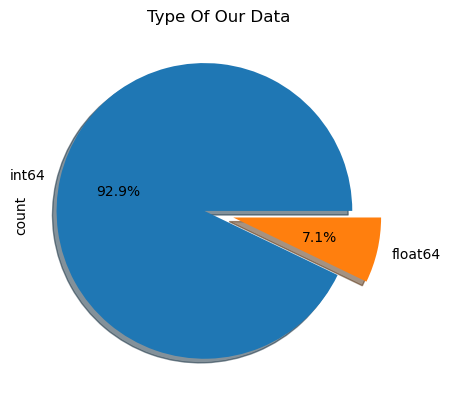

In [8]:
Data.dtypes.value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.1f%%", shadow=True)
plt.title("Type Of Our Data");

In [9]:
Data.info()  # "Method"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
Data.describe().style.background_gradient(cmap="Blues")  # "Method"

                                             |          | [  0%]   00:00 -> (? left)


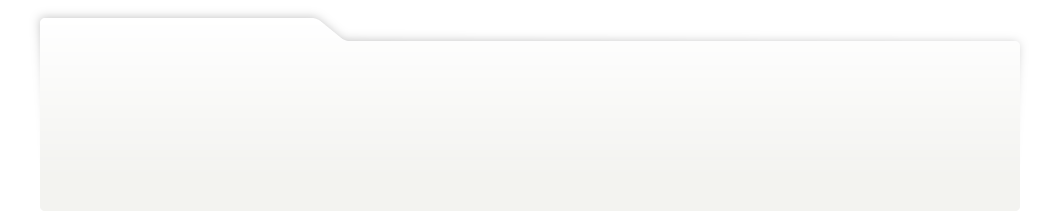
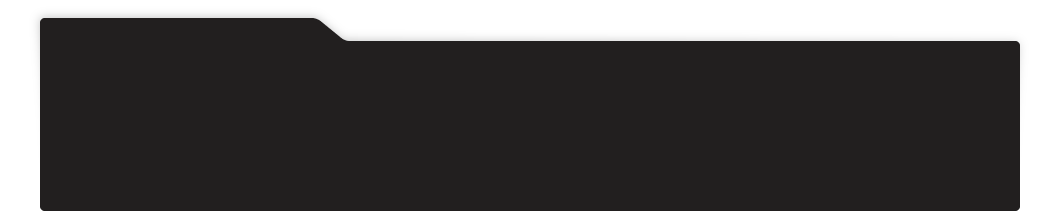
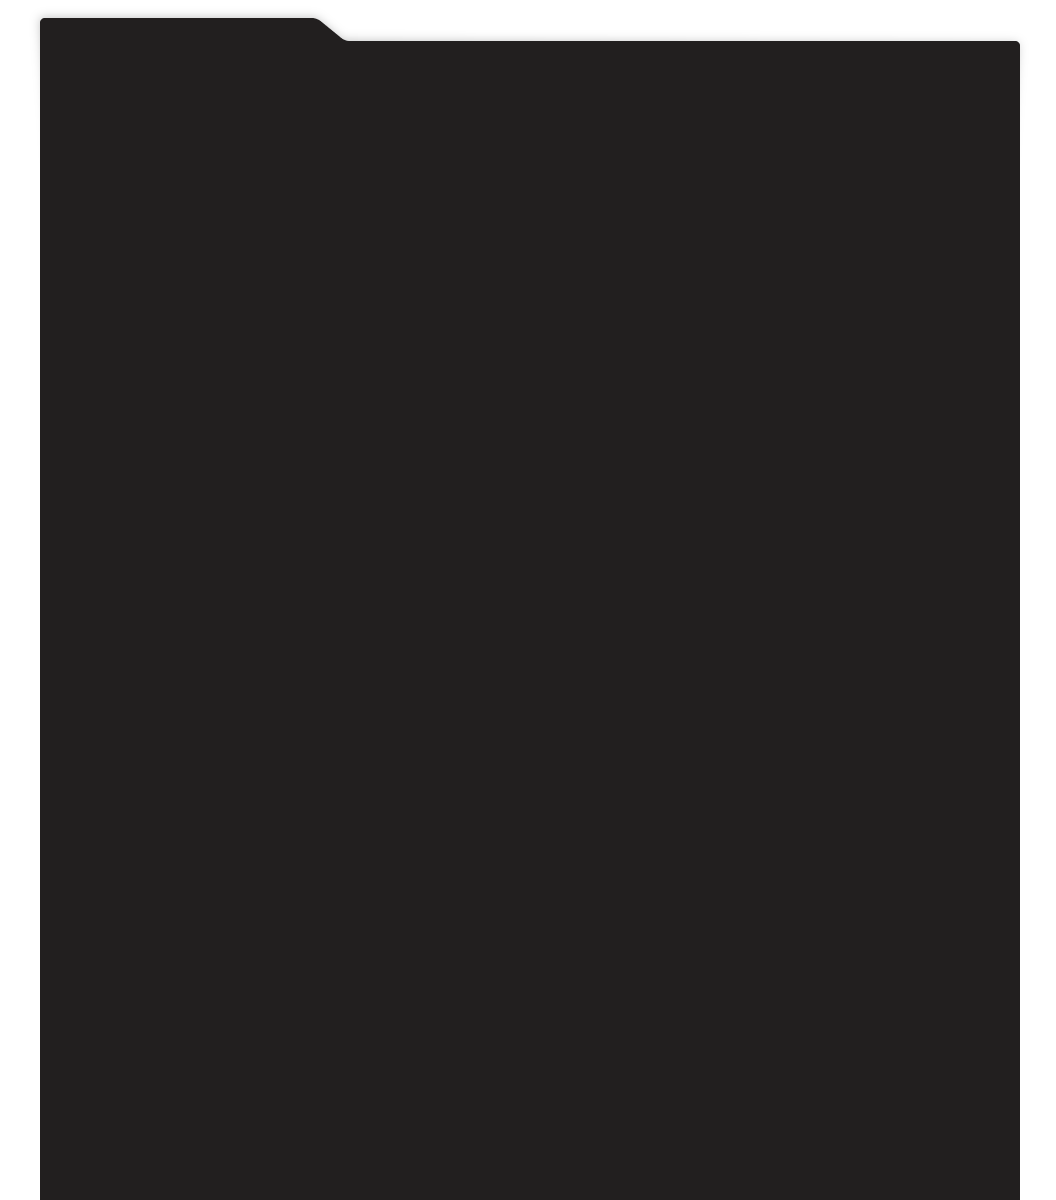
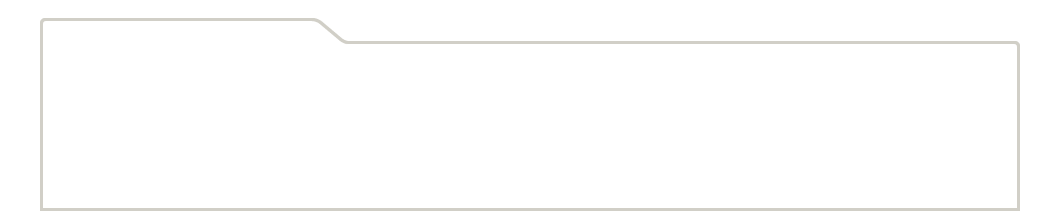
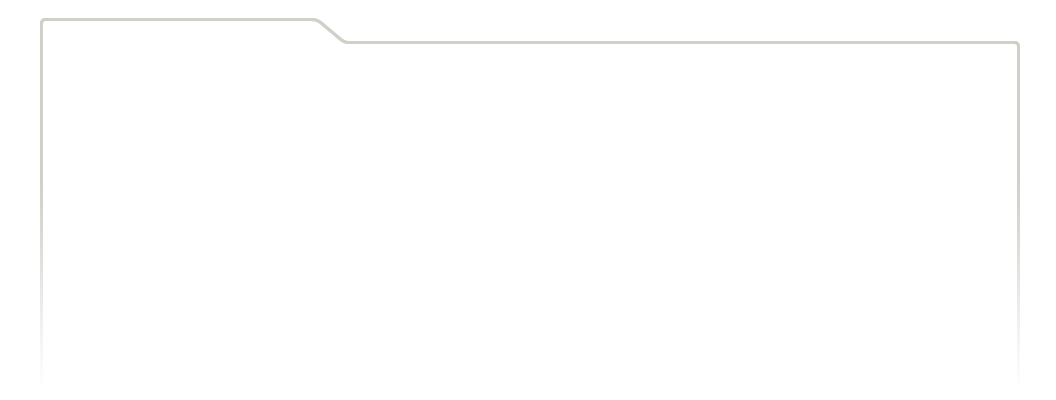
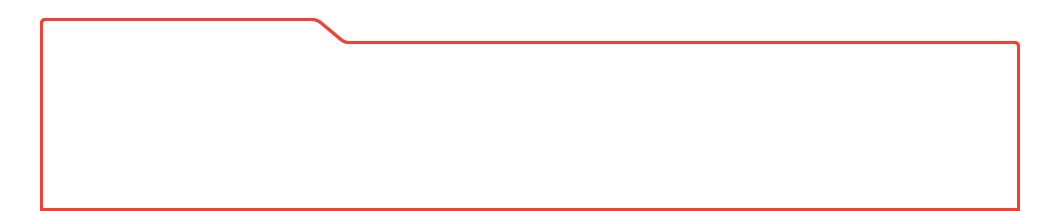
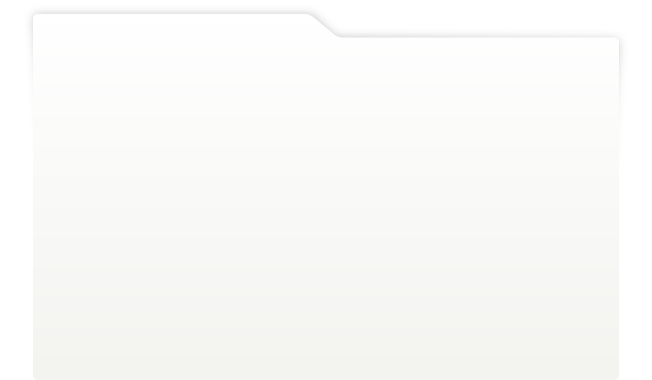
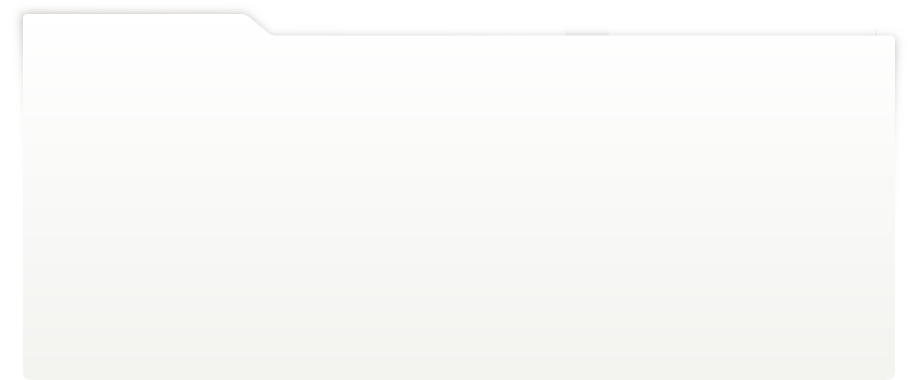
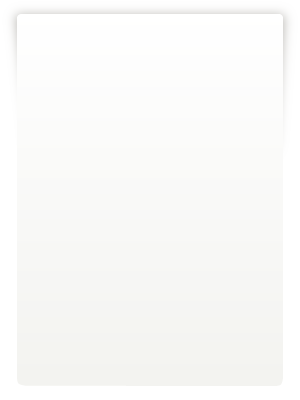
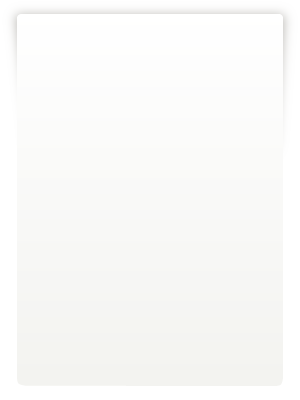
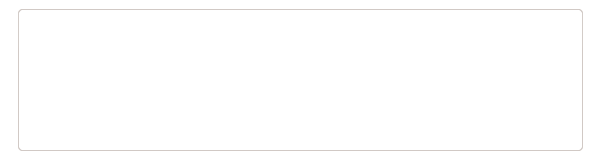
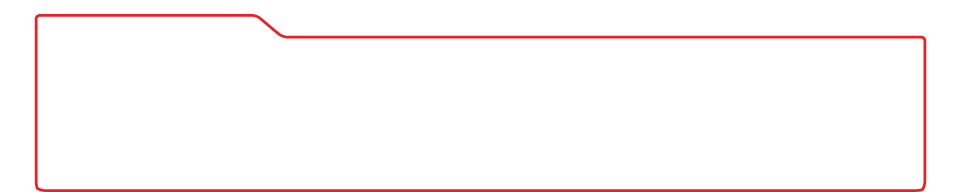
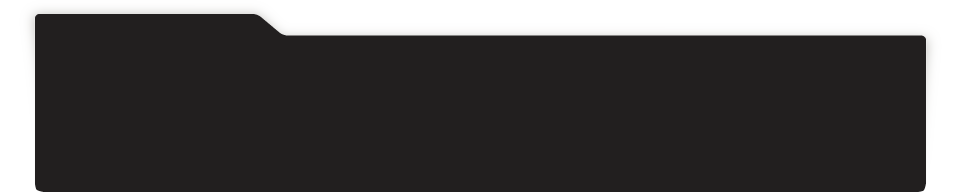
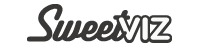
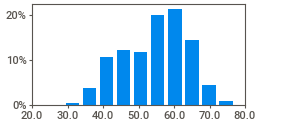
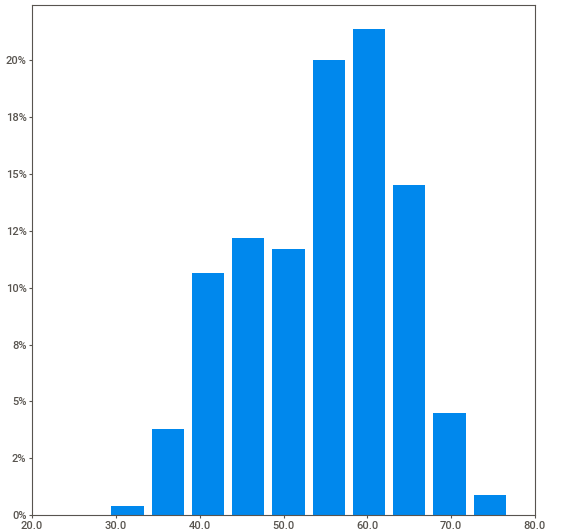
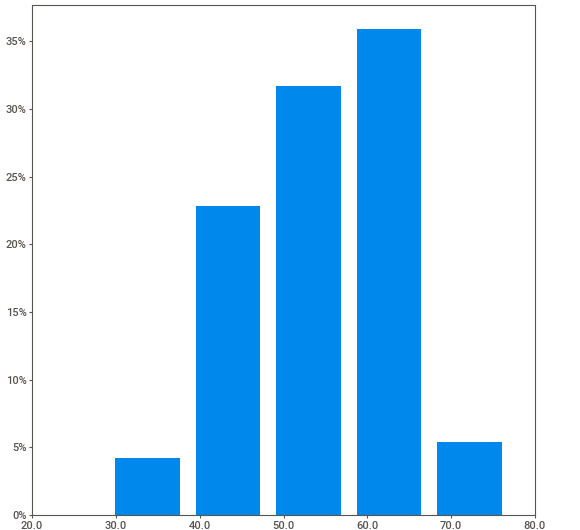
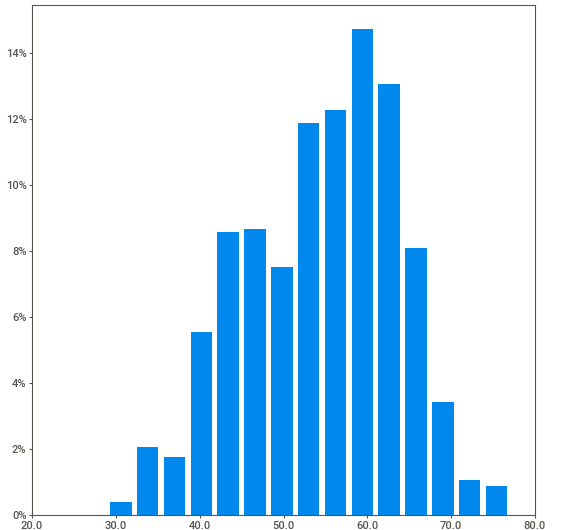
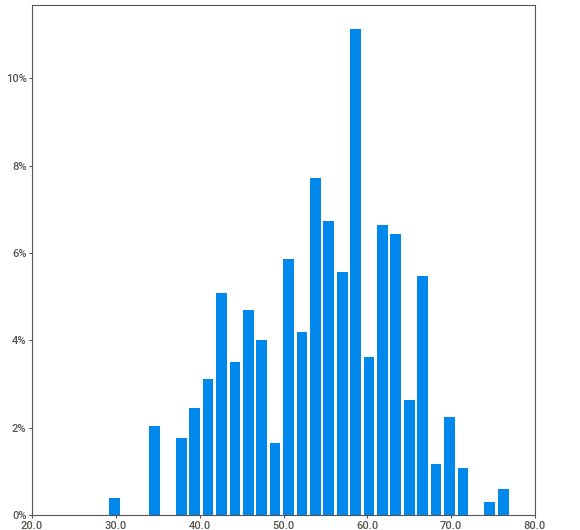
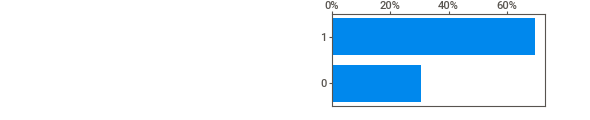
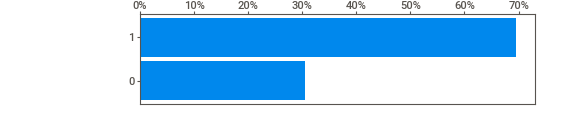
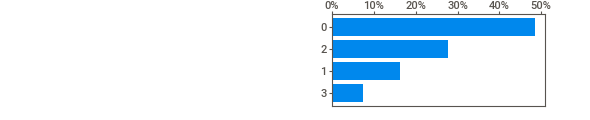
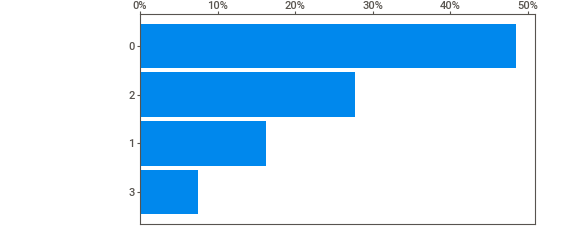
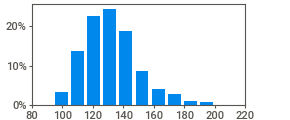
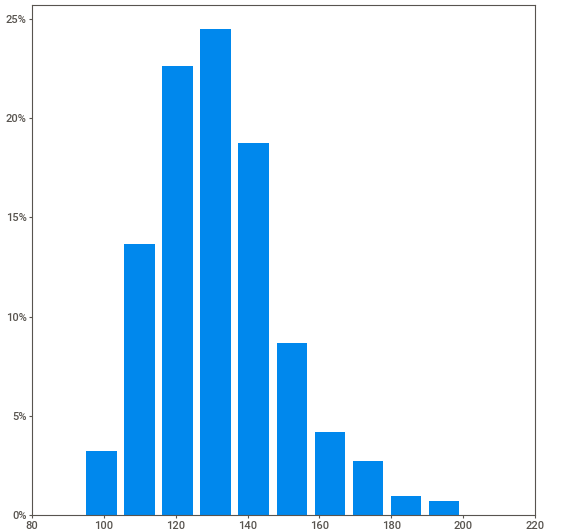
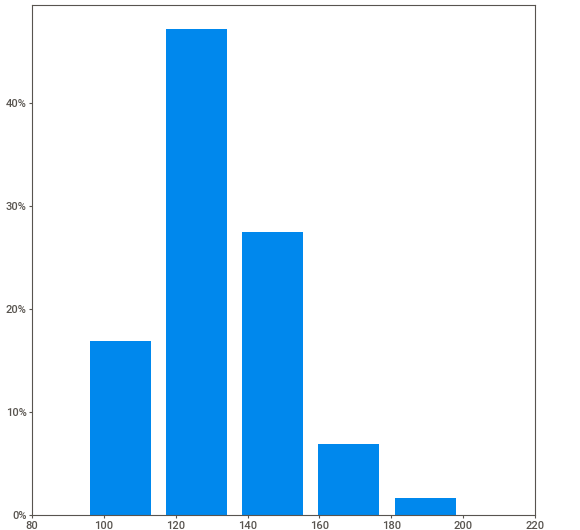
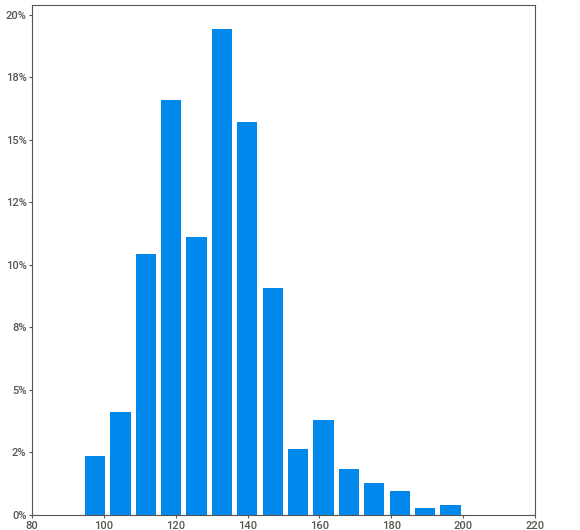
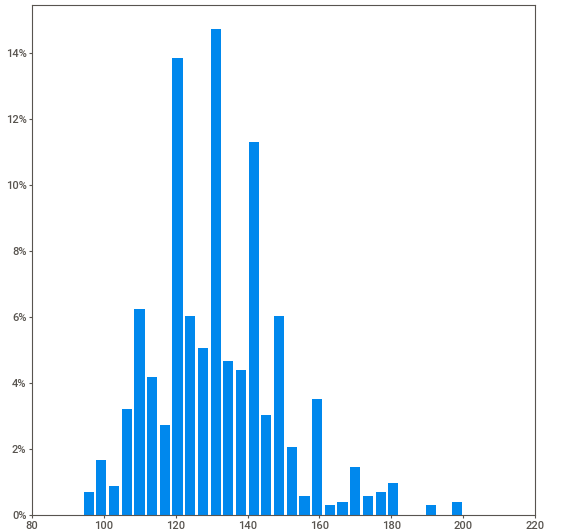
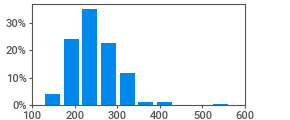
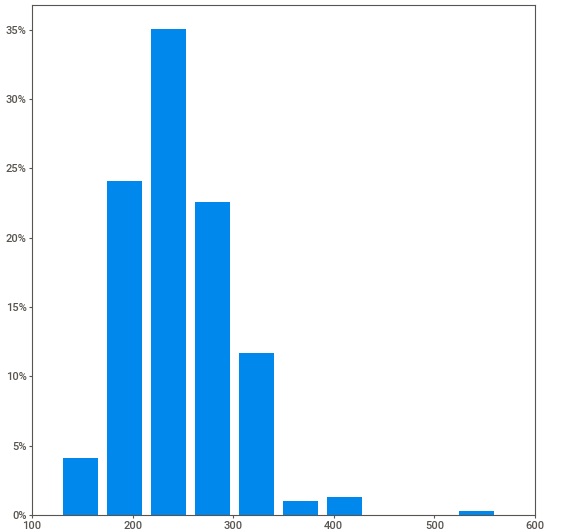
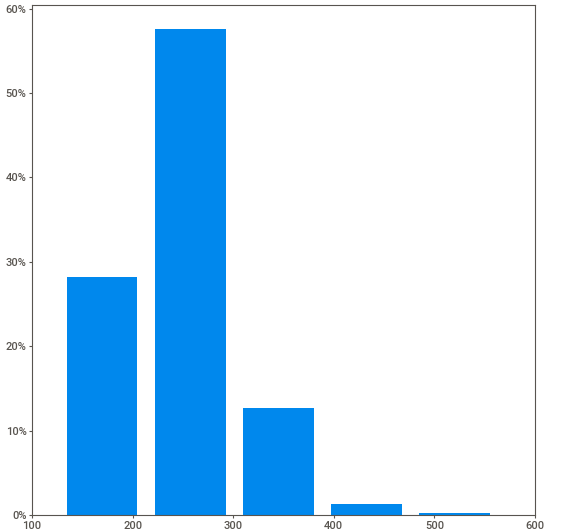
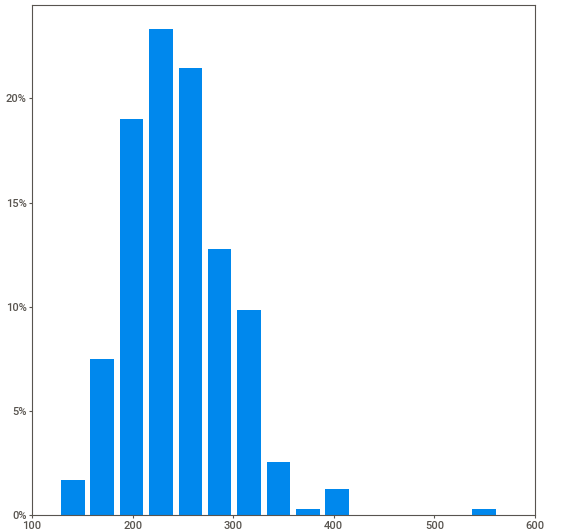
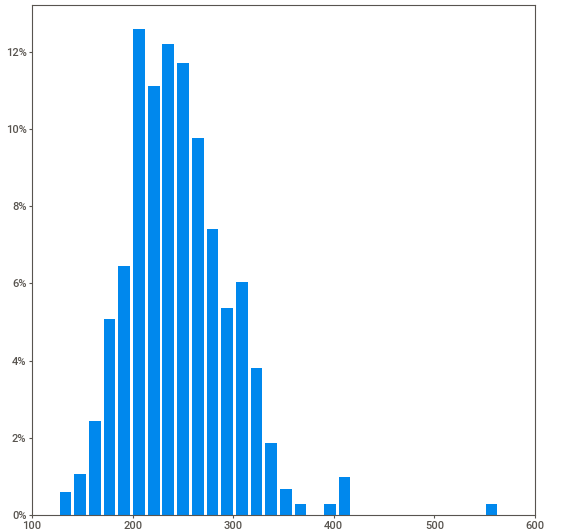
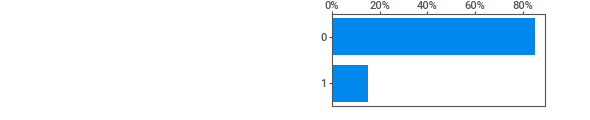
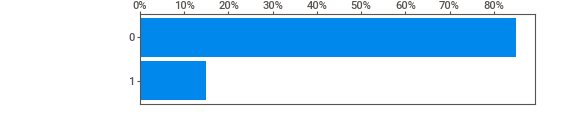
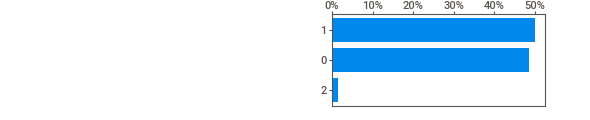
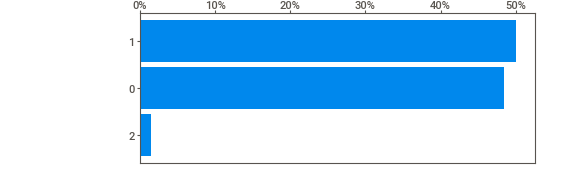
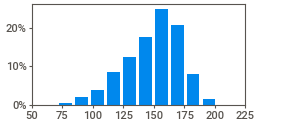
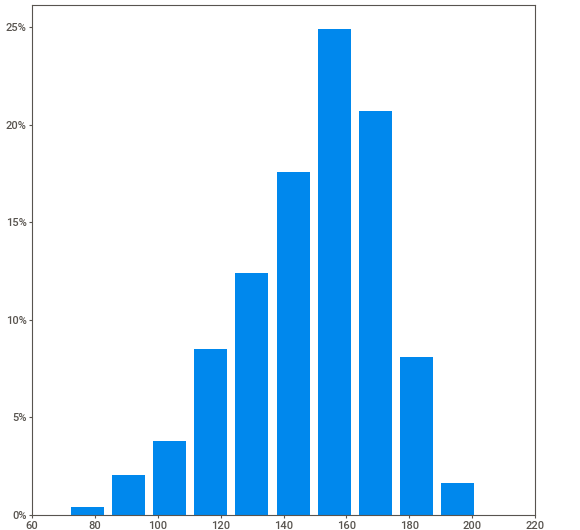
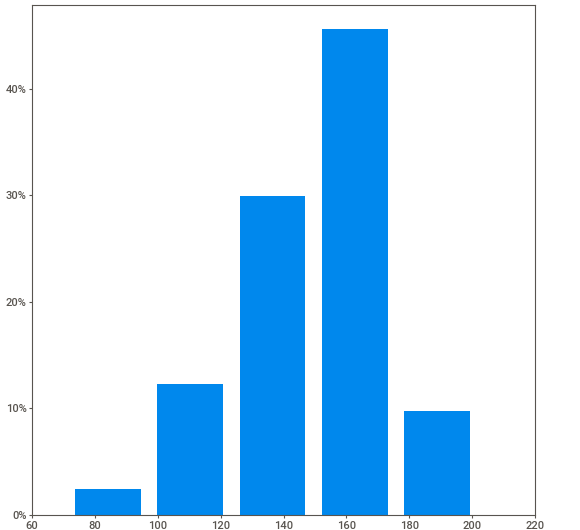
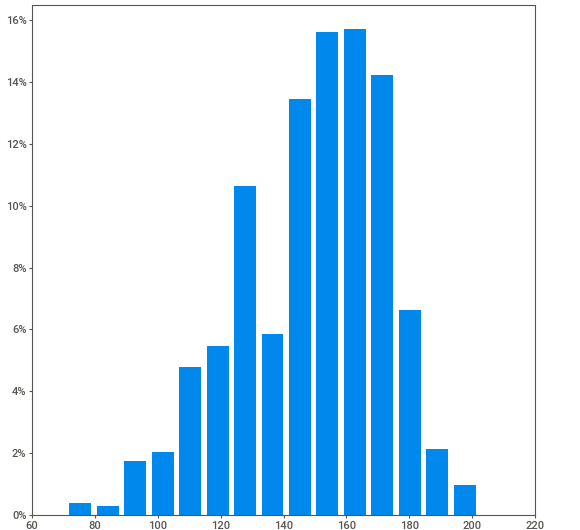
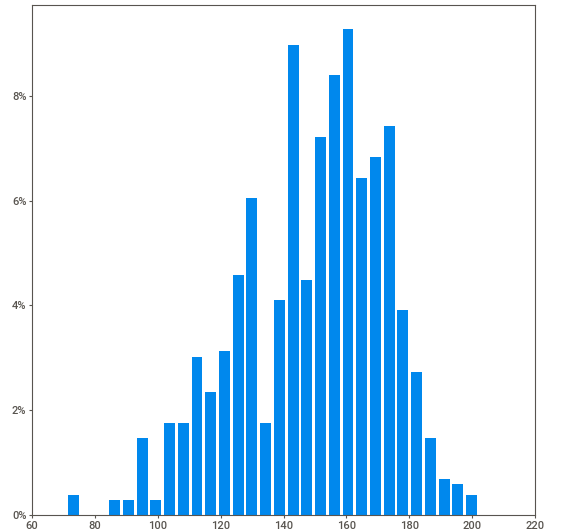
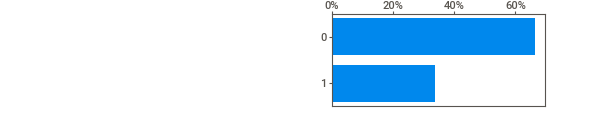
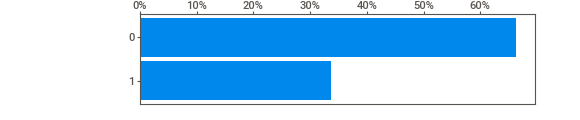
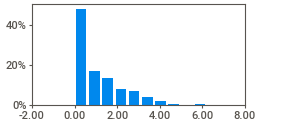
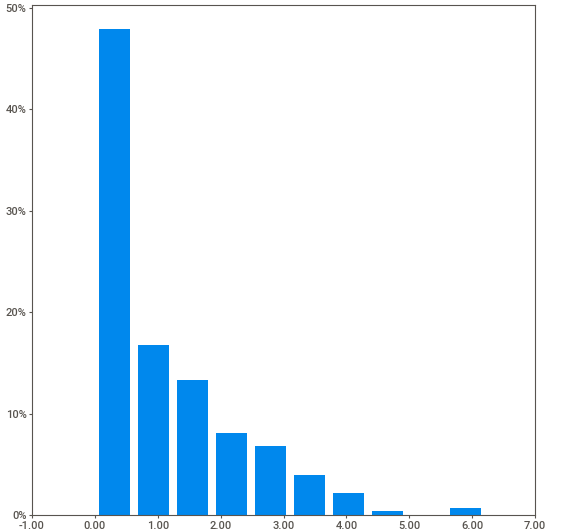
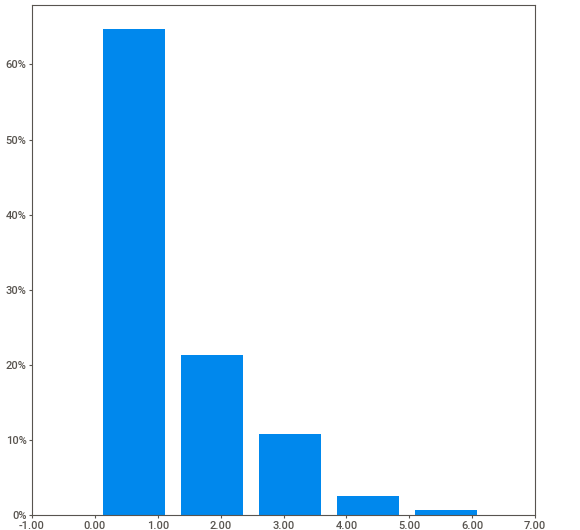
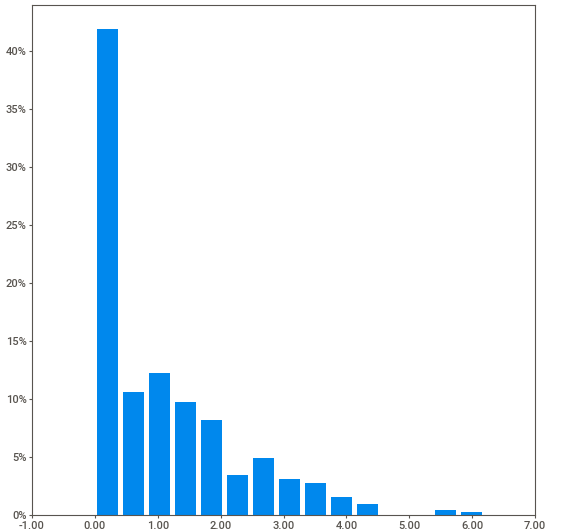
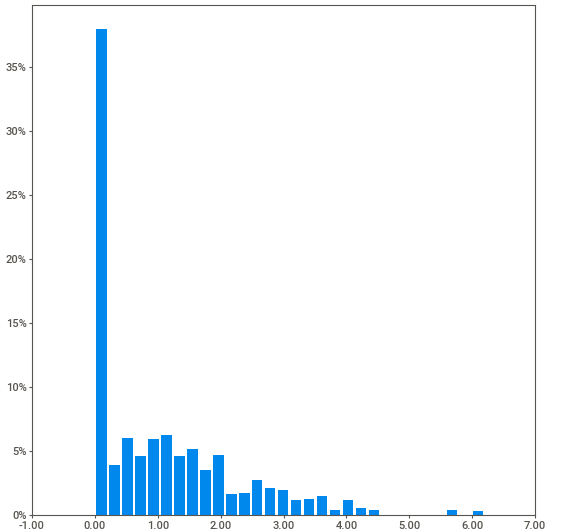
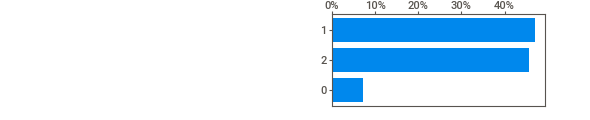
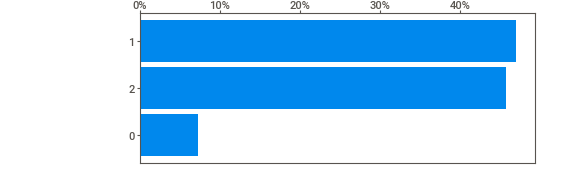
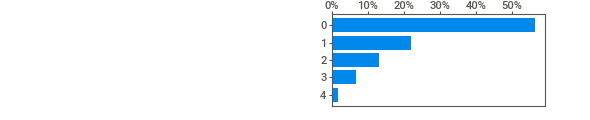
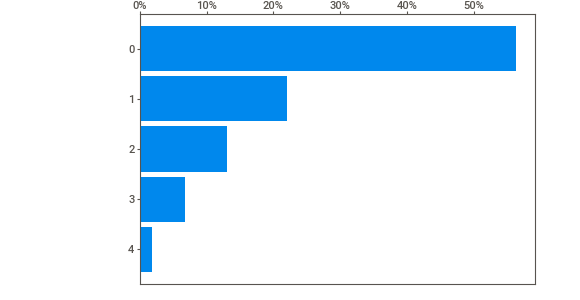
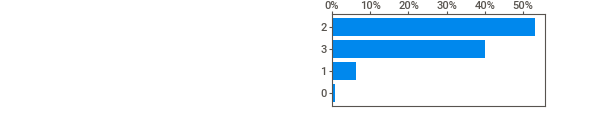
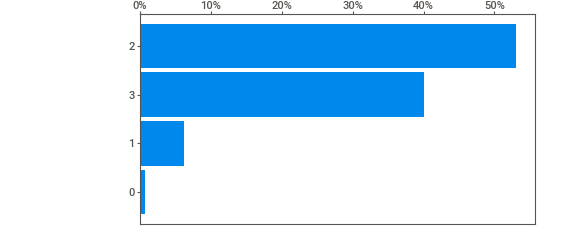
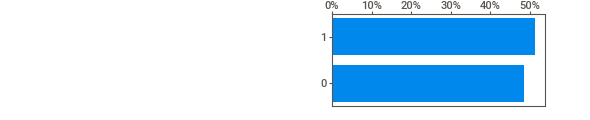
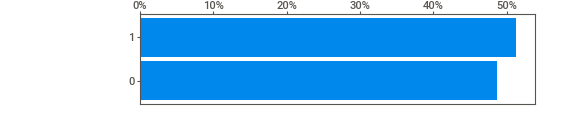
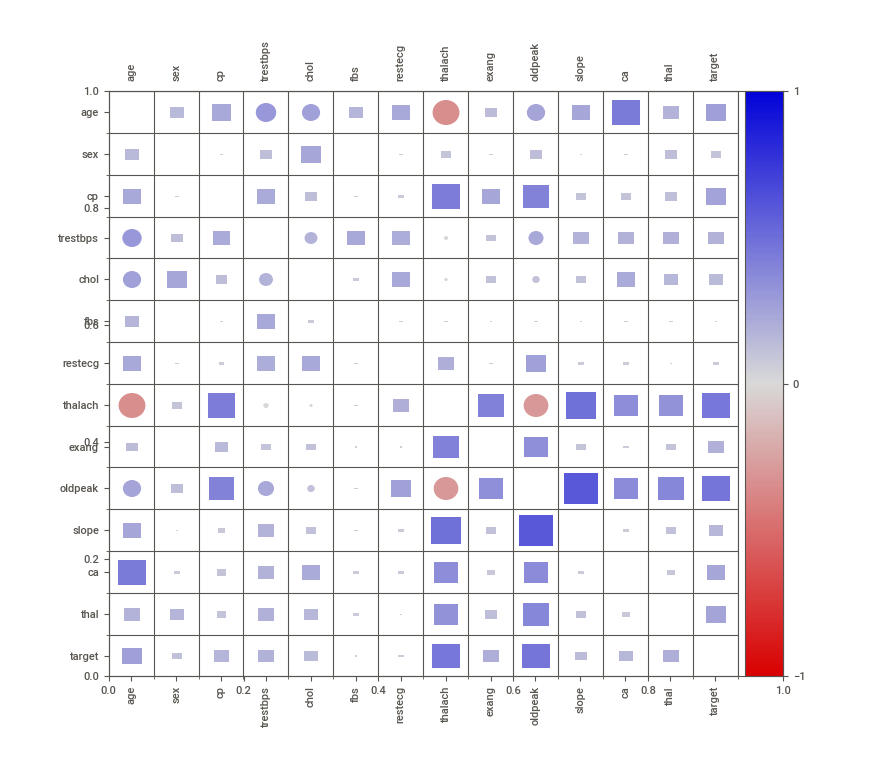
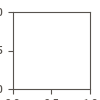

In [11]:
My_Report = sv.analyze(Data)
My_Report.show_notebook(w=None, h=None, scale=None, layout="widescreen", filepath=None)

<a id="3"></a>
# <font size= '6' color='DodgerBlue'>▶ Handling Missing Values</font>

In [12]:
if Data.isnull().values.any():
    print("Unfortunately, there are missing values in the dataset\n") 
else:
    print("Fortunately, there aren't missing values in the dataset.")

Fortunately, there aren't missing values in the dataset.


<a id="4"></a>
# <font size= '6' color='DodgerBlue'>▶ Handling Outliers</font>

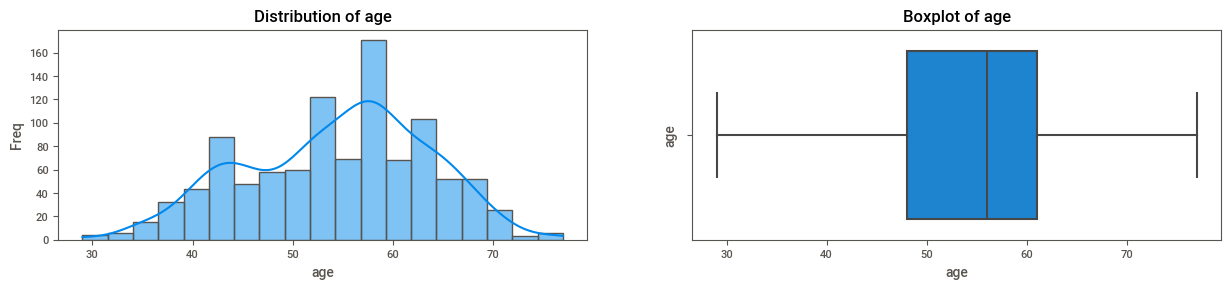

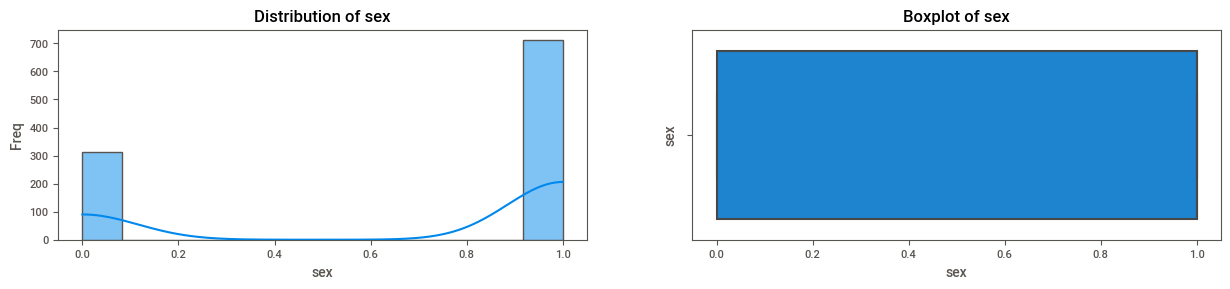

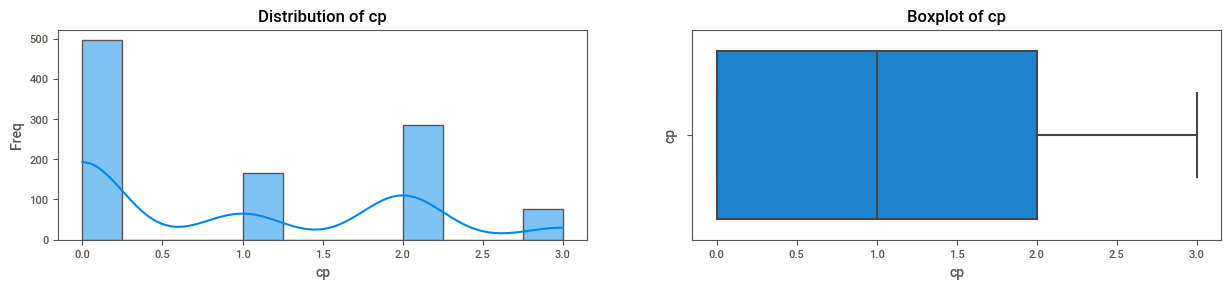

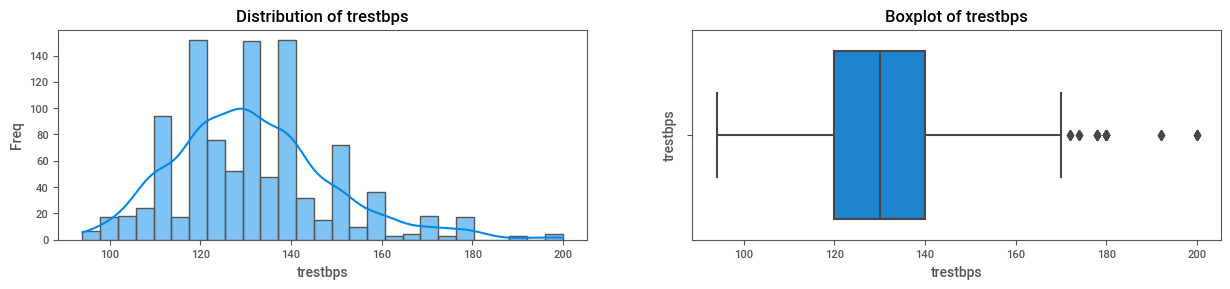

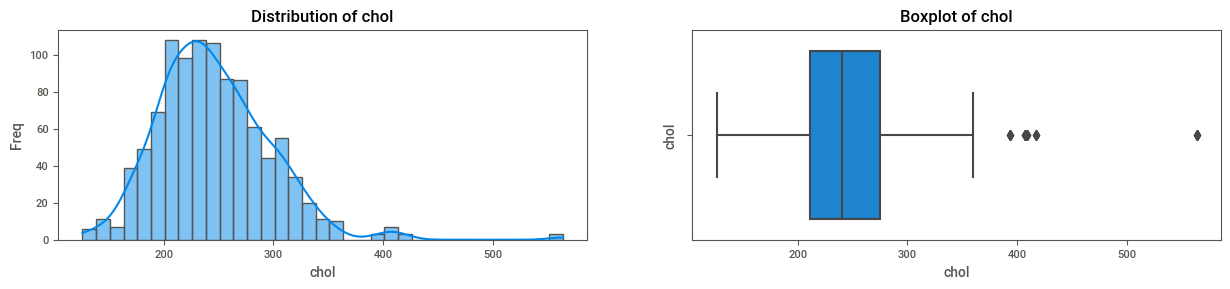

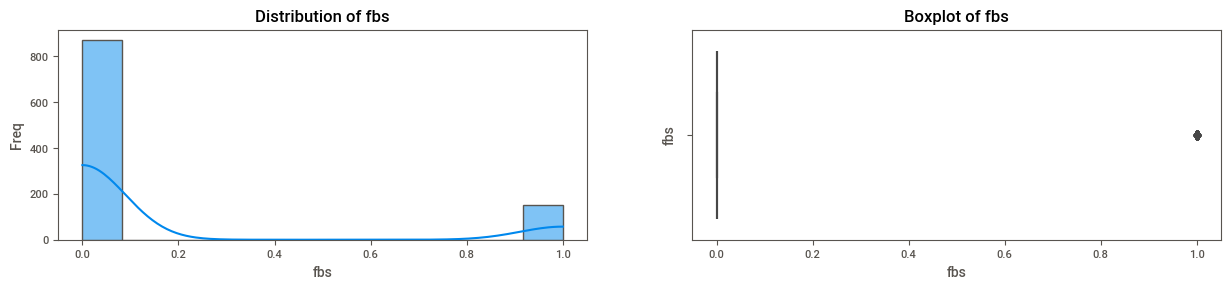

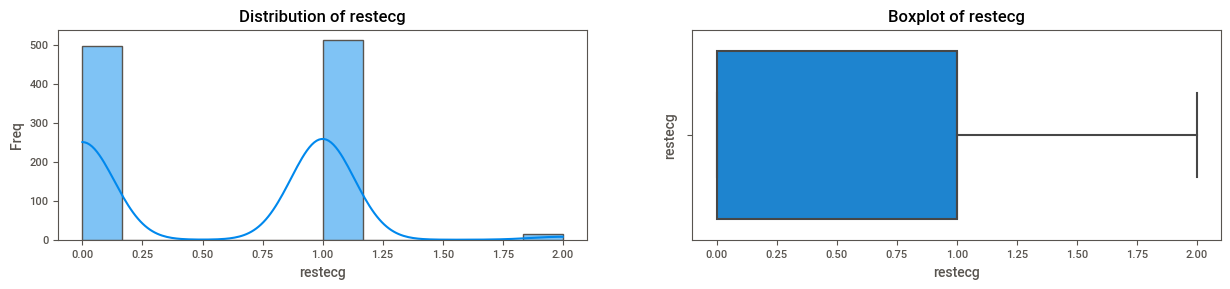

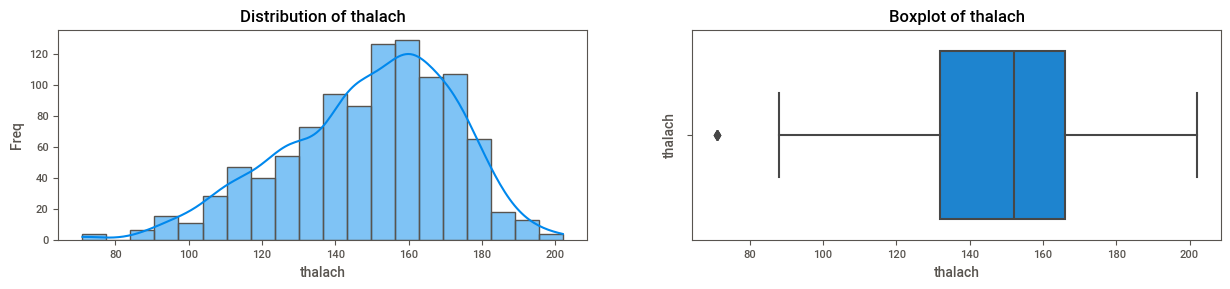

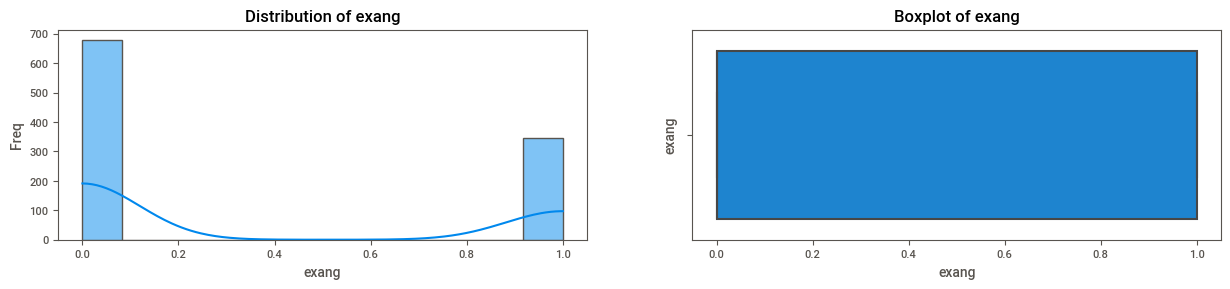

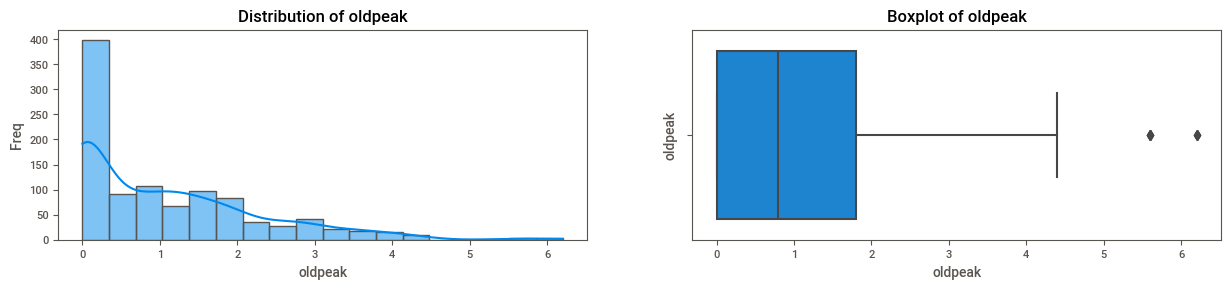

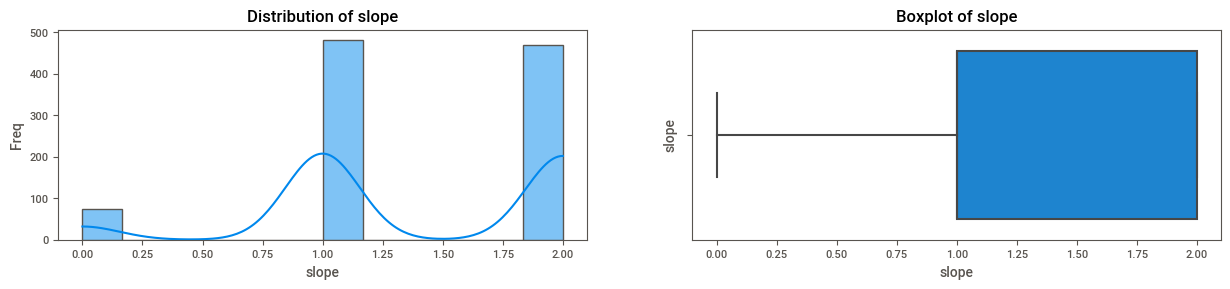

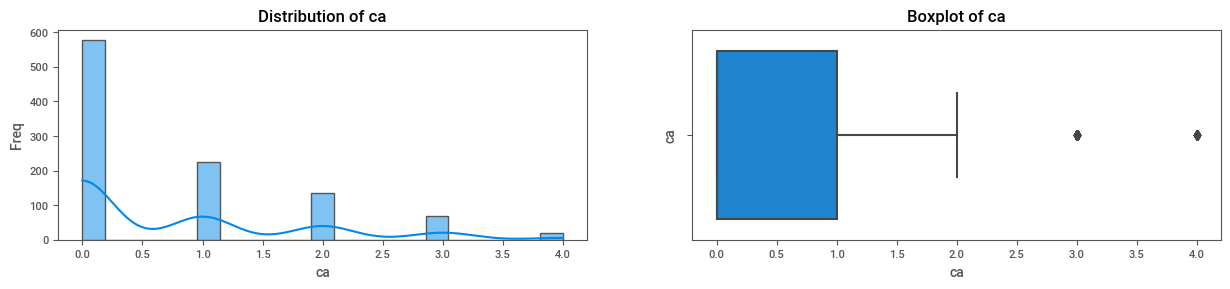

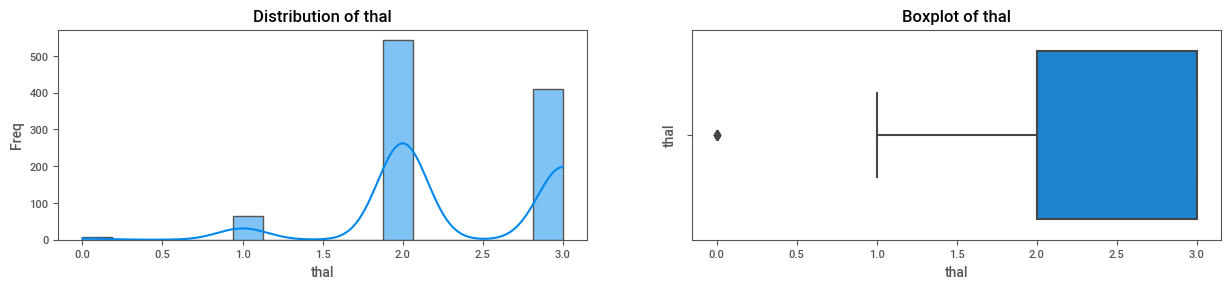

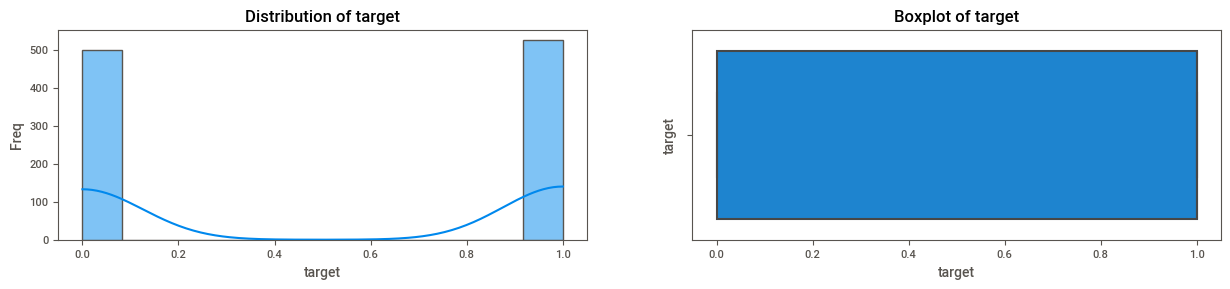

In [13]:
# Outliers = Unusual Values

for column in Data.columns:
    if Data[column].dtype!="object":
        plt.figure(figsize=(15, 6))
        plt.subplot(2, 2, 1)
        sns.histplot(data=Data, x=column, kde=True)
        plt.ylabel("Freq")
        plt.xlabel(column)
        plt.title(f"Distribution of {column}")
        plt.subplot(2, 2, 2)
        sns.boxplot(data=Data, x=column)
        plt.ylabel(column)
        plt.title(f"Boxplot of {column}")
        plt.show()

In [14]:
# Z-Score Normalization 
# Calculate Z-scores for each feature

Z_Scores = (Data - Data.mean()) / Data.std()
Threshold = 3    # Is a commonly used standard
Outliers = (Z_Scores > Threshold) | (Z_Scores < -Threshold)

# Check if there are any outliers
if Outliers.any().any():
    print("Outliers detected in the dataset. Removing them...")
    
    # Remove Outliers
    Data = Data[~Outliers.any(axis=1)]
    Data.reset_index(drop=True, inplace=True)
    
    print("Outliers removed. Data shape:", Data.shape)
else:
    print("No outliers detected in the dataset.")

Outliers detected in the dataset. Removing them...
Outliers removed. Data shape: (969, 14)


In [15]:
# scatter_matrix(Data, figsize=(50,50));

# We can come to various conclusion looking at these plots for example:
# If you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number 
# of pregnancies have lower insulin

In [16]:
Data.columns  # "Attribute"

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**1. Analysis and exploration of categories of the "sex" feature**

In [17]:
# Check labels in "sex" feature

Data["sex"].unique()

array([1, 0], dtype=int64)

In [18]:
Data["sex"].value_counts()

sex
1    680
0    289
Name: count, dtype: int64

In [19]:
Data["sex"].replace({0:"Female", 1:"Male"}, inplace=True)

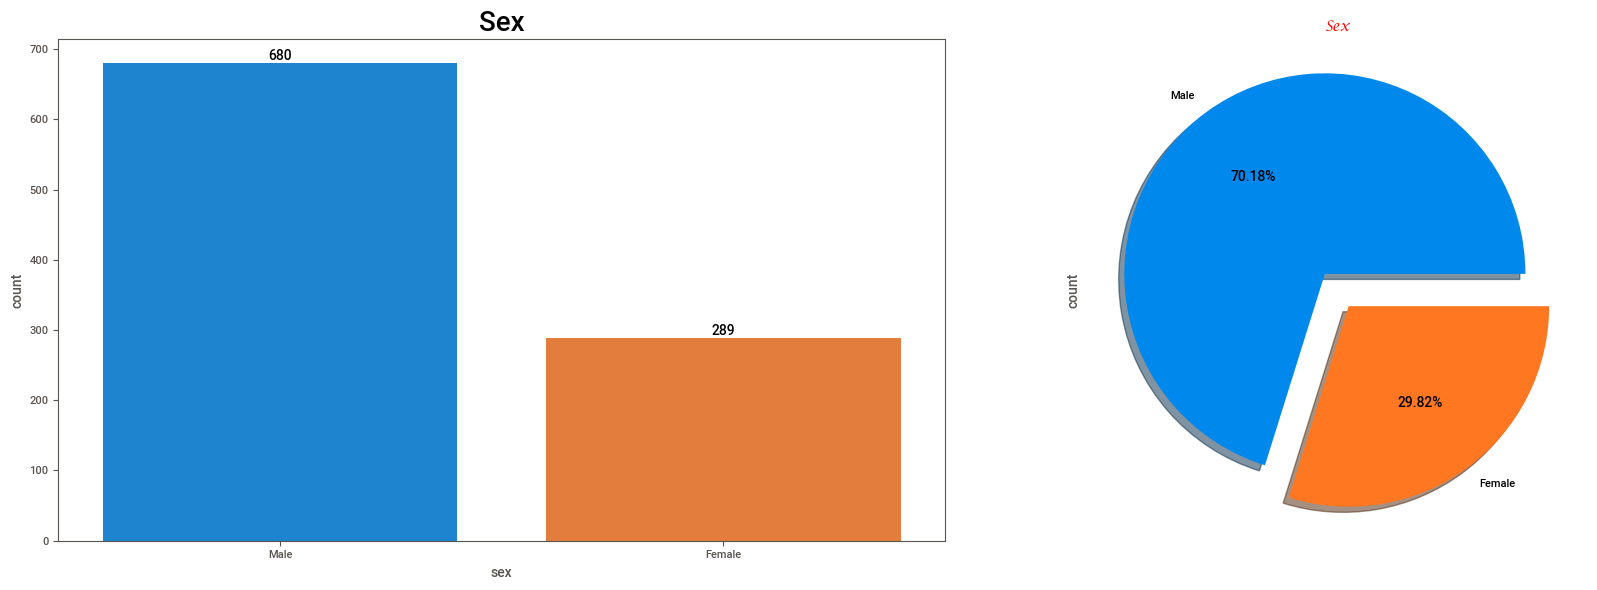

In [20]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x="sex", data=Data)
ax1.bar_label(ax1.containers[0])
ax1.set_title("Sex", fontsize=20)

# Second Subplot
ax2 = plt.subplot(1, 2, 2)
Data["sex"].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.2f%%", shadow=True)
ax2.set_title(label="Sex", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

**2. Analysis and exploration of categories of the "cp" feature**

In [21]:
# Check labels in "cp" feature

Data["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

In [22]:
Data["cp"].value_counts()

cp
0    468
2    264
1    160
3     77
Name: count, dtype: int64

In [23]:
# Chest Pain Type
# (0) => asymptomatic
# (1) => atypical angina
# (2) => non-angina pain
# (3) => typical angina

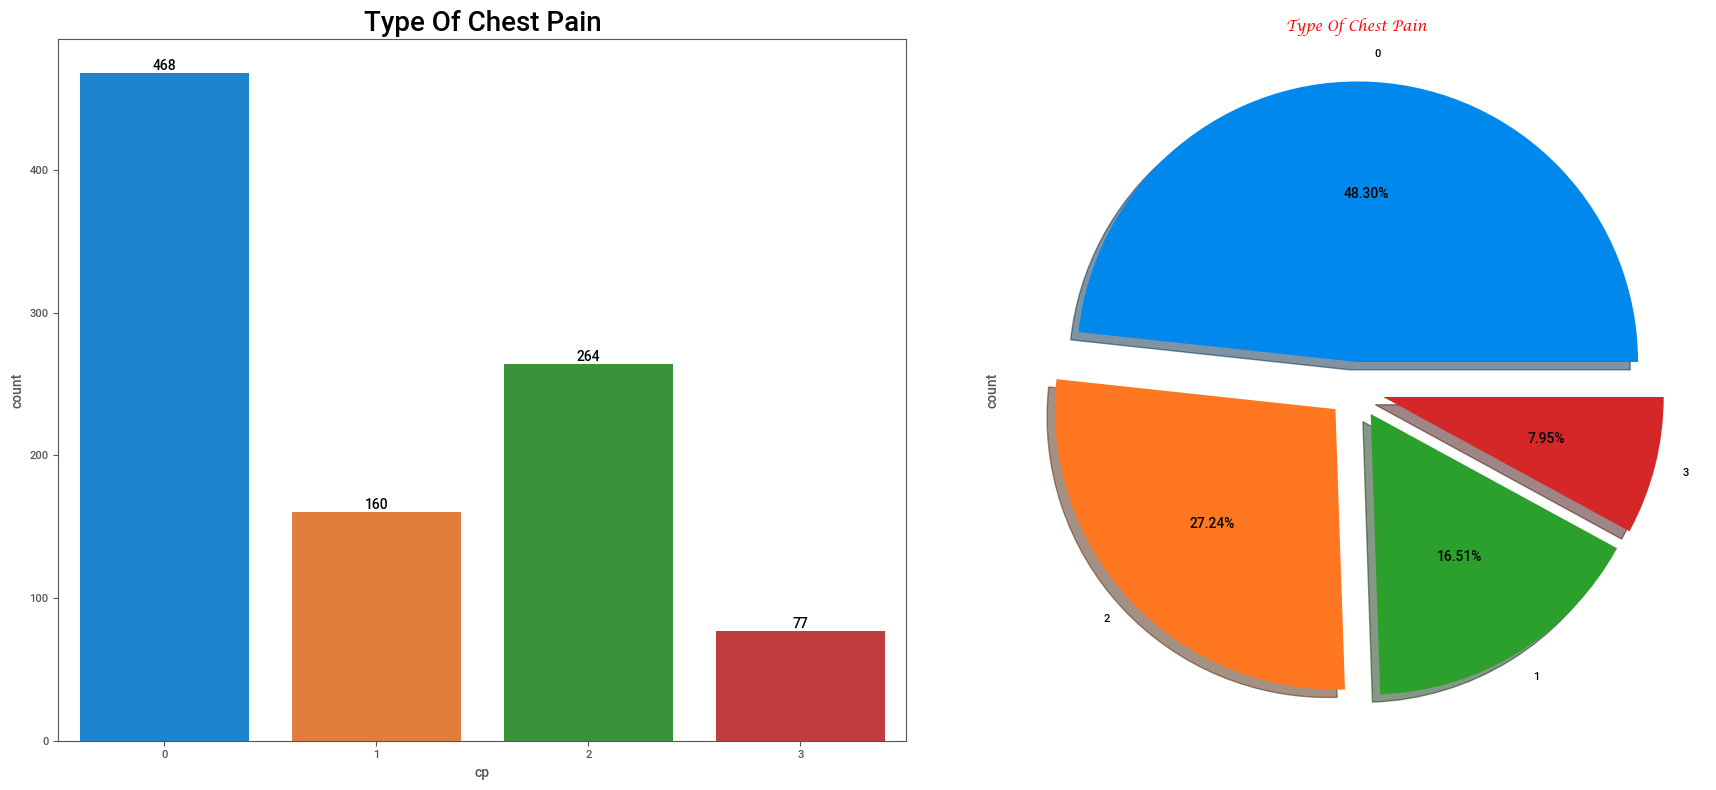

In [24]:
# Set the figure size
plt.figure(figsize=(18, 8))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="cp", data=Data, ax=Left_Shape)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Type Of Chest Pain", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["cp"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1], autopct="%1.2f%%", 
                                   shadow=True, ax=Right_Shape)

Right_Shape.set_title(label="Type Of Chest Pain", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

**3. Analysis and exploration of categories of the "fbs" feature**

In [25]:
# Check labels in "fbs" feature

Data["fbs"].unique()

array([0, 1], dtype=int64)

In [26]:
Data["fbs"].value_counts()

fbs
0    830
1    139
Name: count, dtype: int64

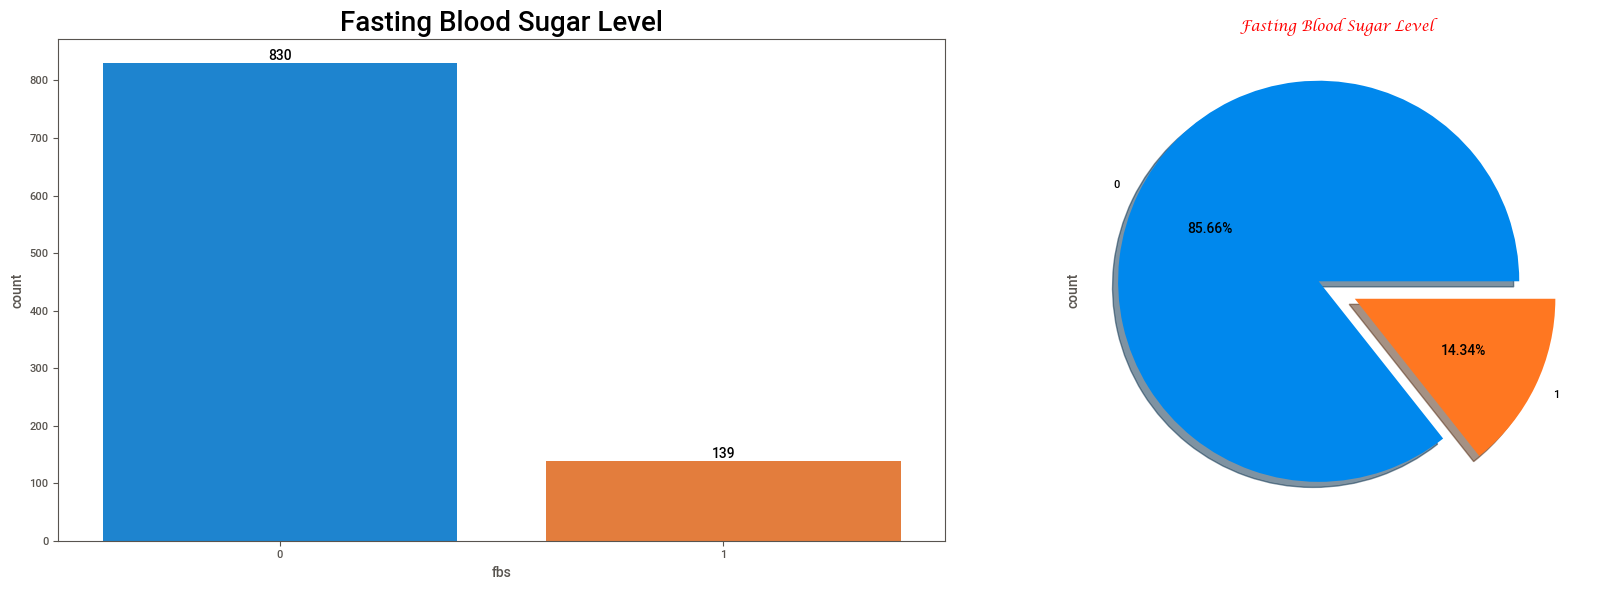

In [27]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="fbs", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Fasting Blood Sugar Level", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["fbs"].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Fasting Blood Sugar Level", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

**4. Analysis and exploration of categories of the "restecg" feature**

In [28]:
# Check labels in "restecg" feature

Data["restecg"].unique()

array([1, 0, 2], dtype=int64)

In [29]:
Data["restecg"].value_counts()

restecg
1    486
0    468
2     15
Name: count, dtype: int64

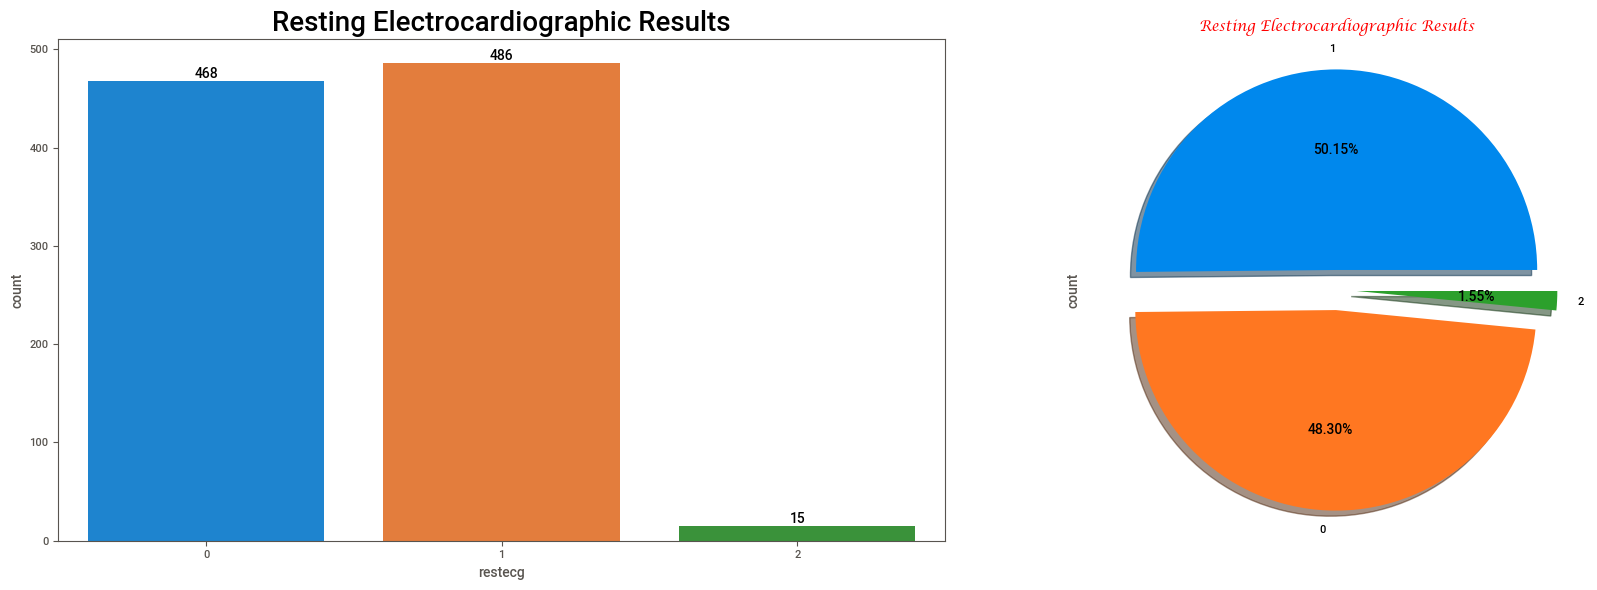

In [30]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="restecg", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Resting Electrocardiographic Results", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["restecg"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Resting Electrocardiographic Results", fontsize=50, 
                      color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

**5. Analysis and exploration of categories of the "exang" feature**

In [31]:
# Check labels in "exang" feature

Data["exang"].unique()

array([0, 1], dtype=int64)

In [32]:
Data["exang"].value_counts()

exang
0    642
1    327
Name: count, dtype: int64

In [33]:
# (0) => No
# (1) => Yes

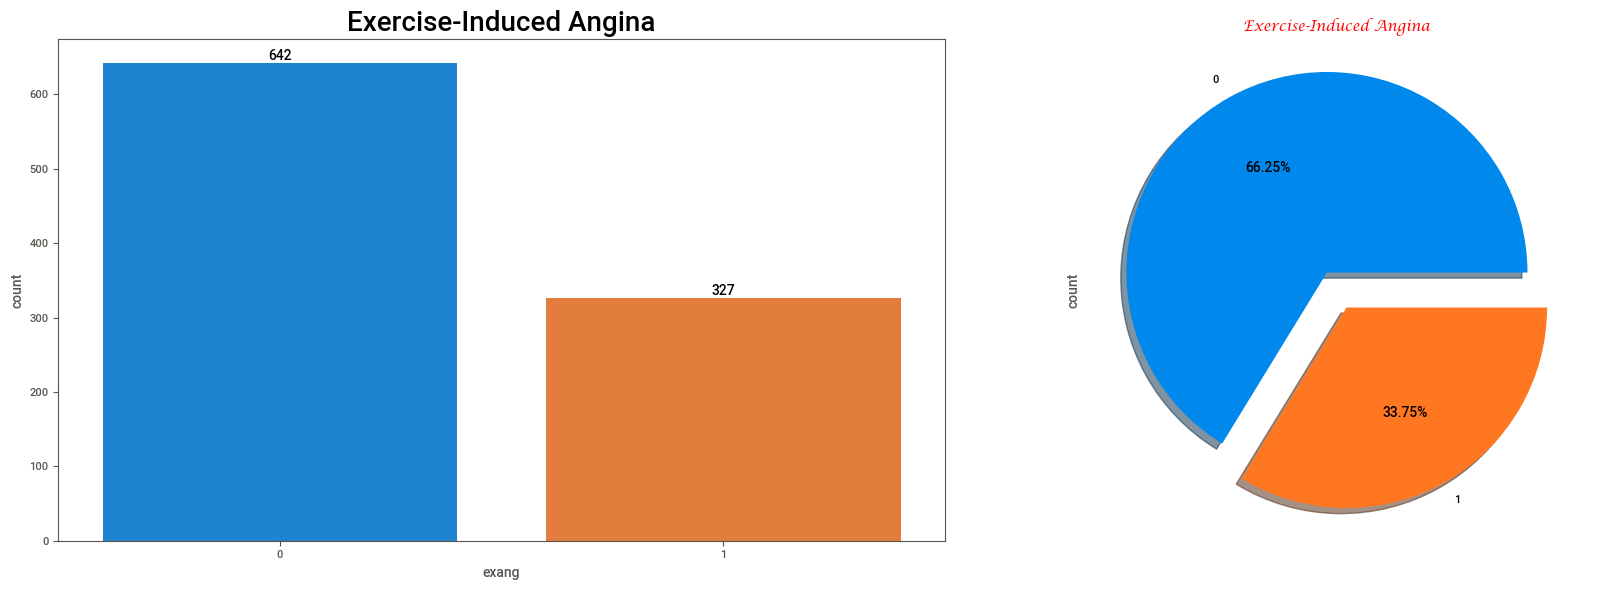

In [34]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="exang", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Exercise-Induced Angina", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["exang"].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Exercise-Induced Angina", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

**6. Analysis and exploration of categories of the "slope" feature**

In [35]:
# Check labels in "slope" feature

Data["slope"].unique()

array([2, 0, 1], dtype=int64)

In [36]:
Data["slope"].value_counts()

slope
1    457
2    449
0     63
Name: count, dtype: int64

In [37]:
# (0) => Down-Sloping
# (1) => Flat
# (2) => Up-Sloping

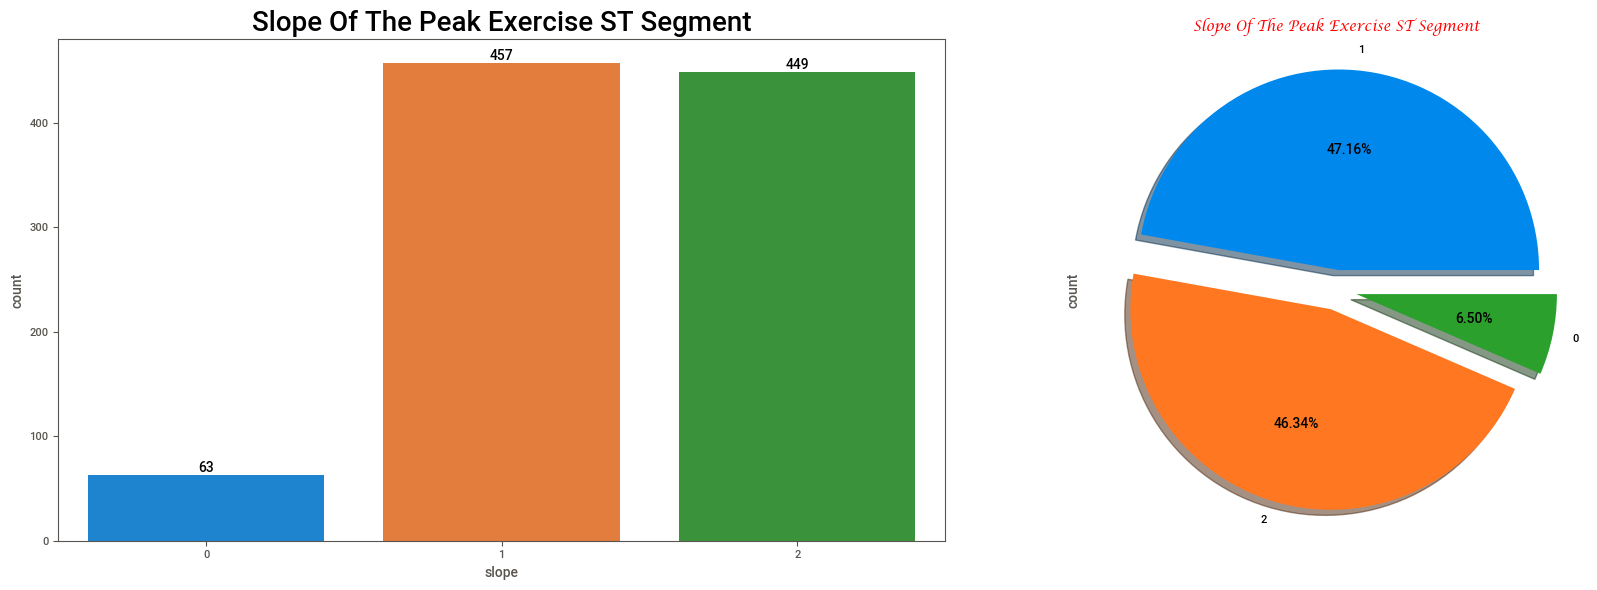

In [38]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="slope", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Slope Of The Peak Exercise ST Segment", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["slope"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Slope Of The Peak Exercise ST Segment", fontsize=50, 
                      color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

**7. Analysis and exploration of categories of the "ca" feature**

In [39]:
# Check labels in "ca" feature

Data["ca"].unique()

array([2, 0, 1, 3], dtype=int64)

In [40]:
Data["ca"].value_counts()

ca
0    560
1    220
2    127
3     62
Name: count, dtype: int64

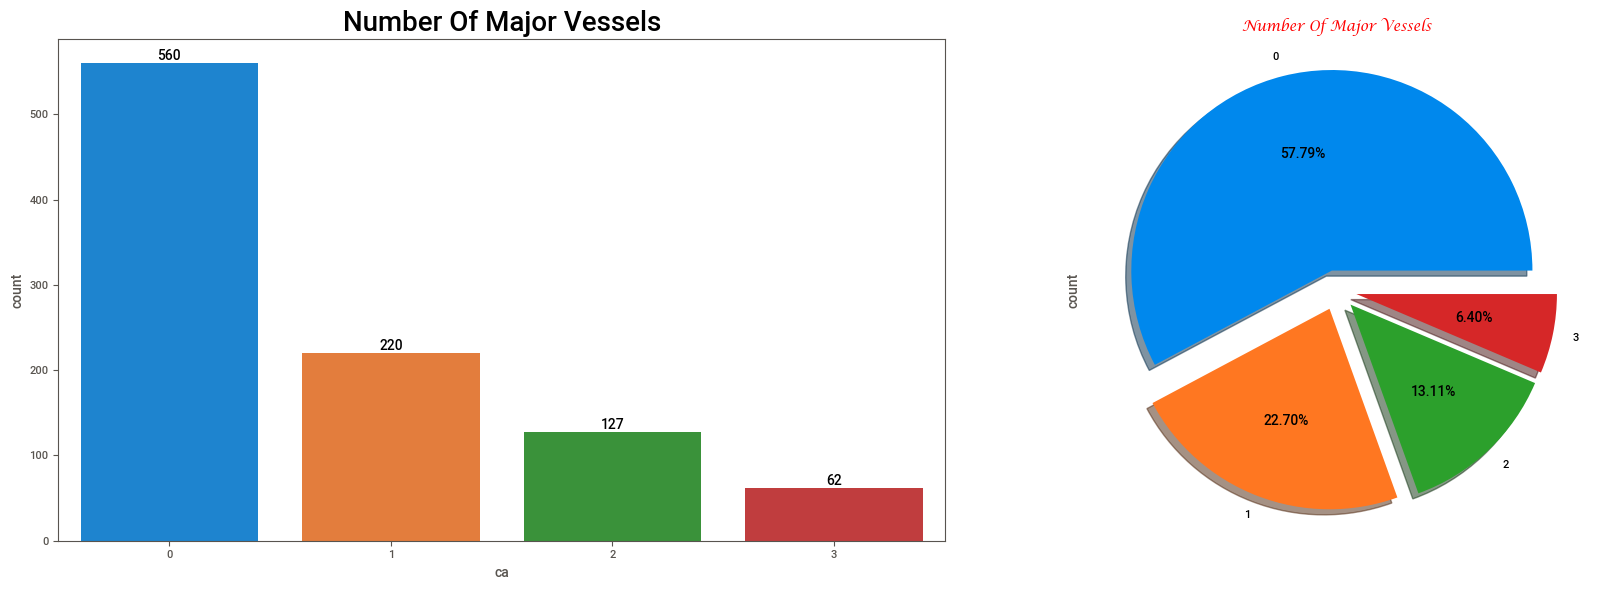

In [41]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="ca", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Number Of Major Vessels", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["ca"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Number Of Major Vessels", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

**8. Analysis and exploration of categories of the "thal" feature**

In [42]:
# Check labels in "thal" feature

Data["thal"].unique()

array([3, 2, 1], dtype=int64)

In [43]:
Data["thal"].value_counts()

thal
2    526
3    379
1     64
Name: count, dtype: int64

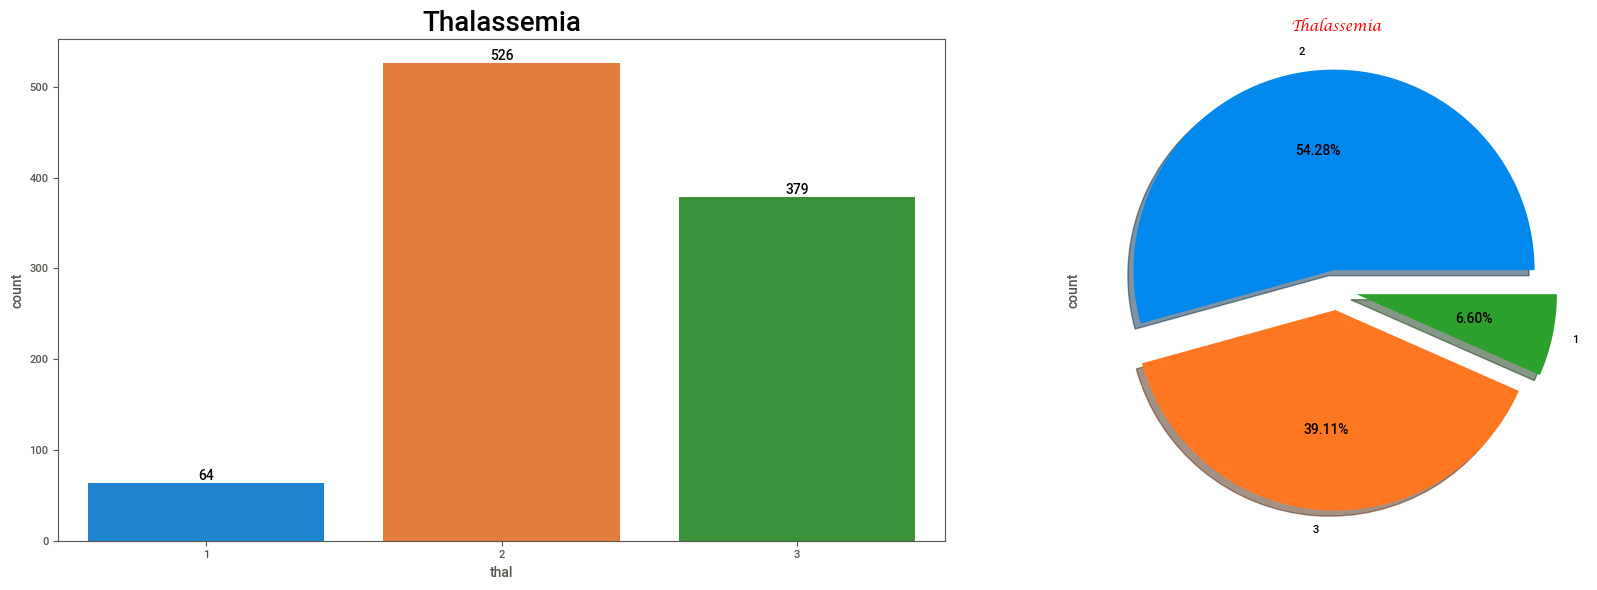

In [44]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="thal", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Thalassemia", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["thal"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Thalassemia", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

**9. Analysis and exploration of categories of the "target" feature**

In [45]:
# Check labels in "target" feature

Data["target"].unique()

array([0, 1], dtype=int64)

In [46]:
Data["target"].value_counts()

# (0) => This person hasn't heart disease.
# (1) => This person has heart disease.

target
1    502
0    467
Name: count, dtype: int64

In [47]:
Data["target"].replace({0:"This person hasn't heart disease", 
                        1:"This person has heart disease"}, inplace=True)

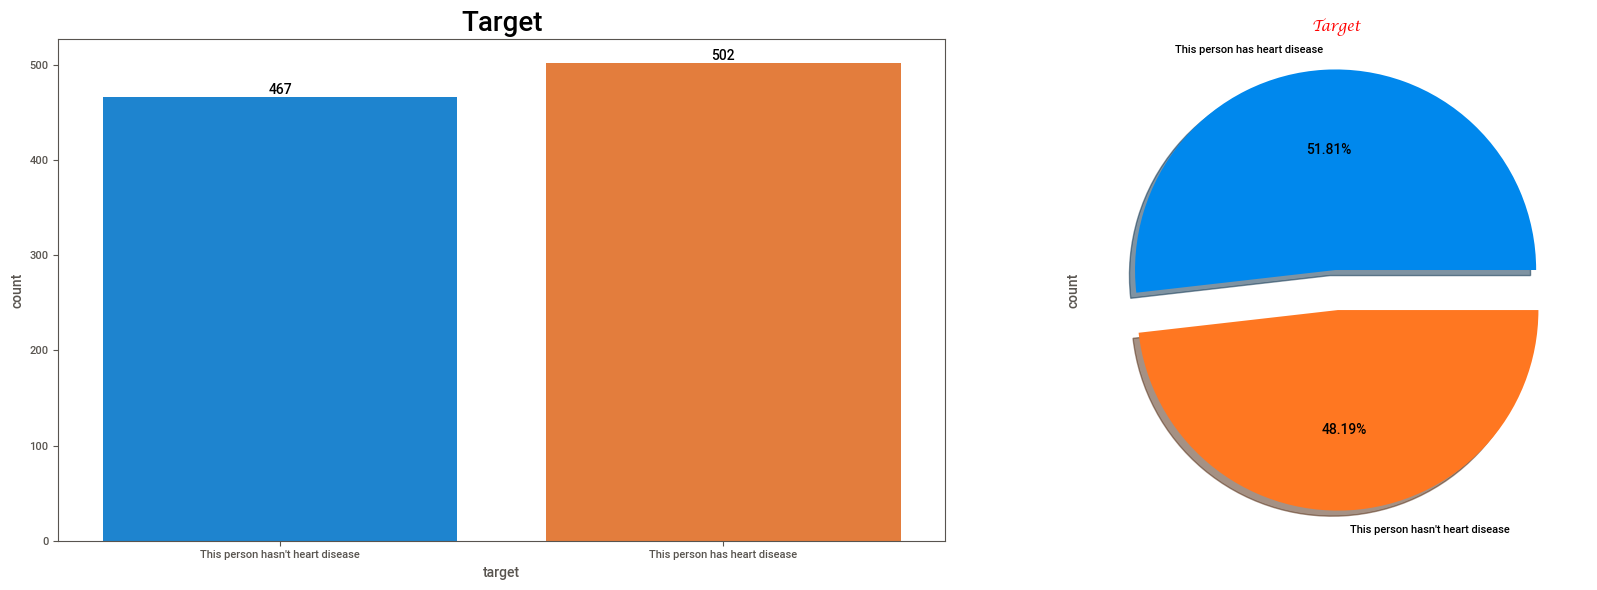

In [48]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="target", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Target", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["target"].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Target", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

# (0) => This person hasn't heart disease.
# (1) => This person has heart disease.

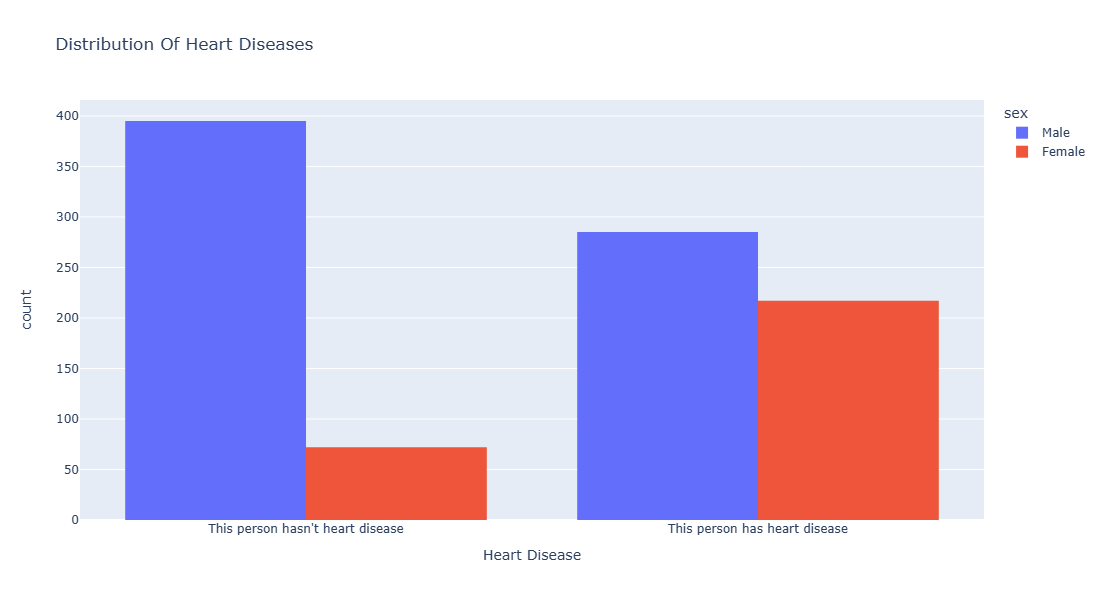

In [49]:
# Univariate Analysis

Fig = px.histogram(Data, x="target", color="sex", hover_data=Data.columns, 
                   title="Distribution Of Heart Diseases", barmode="group")

Fig.update_layout(width=1000, height=600, xaxis_title="Heart Disease", yaxis_title="count")
Fig.show()

In [50]:
# Label Encoding
Data["sex"].replace({"Female":0, "Male":1}, inplace=True)

# Label Encoding
Data["target"].replace({"This person hasn't heart disease":0, 
                        "This person has heart disease":1}, inplace=True)

In [51]:
# The correlation between features
# Understanding the correlation between various features in the dataset
# Select only the numeric columns

Data.corr().style.background_gradient(cmap="coolwarm").format("{:.3f}")

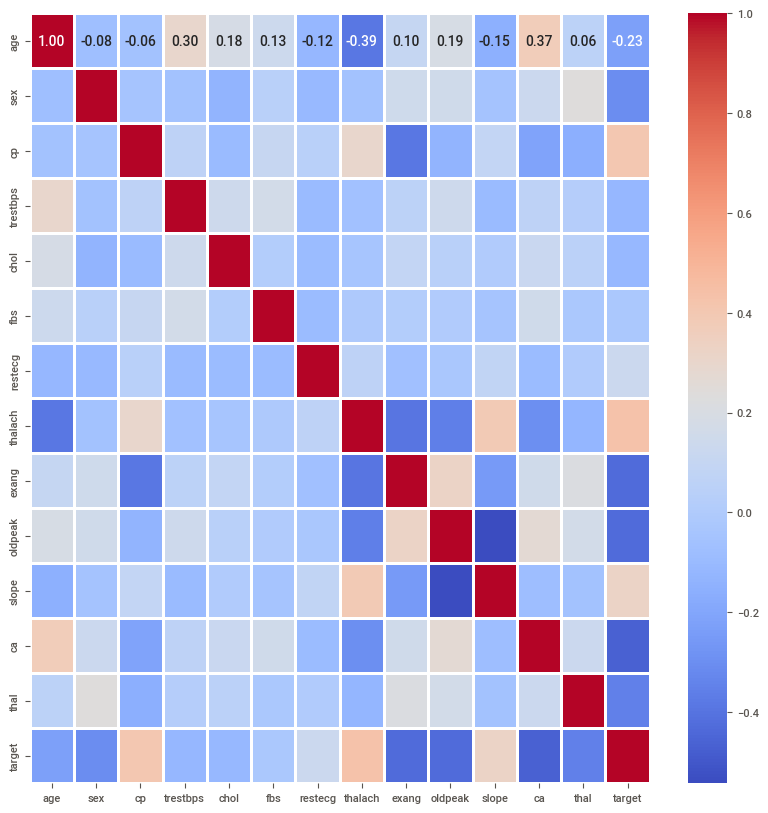

In [52]:
# Bivariate Analysis

plt.figure(figsize=(10, 10))
sns.heatmap(Data.corr(), annot=True, linewidths=0.9, fmt=".2f", cmap="coolwarm")
plt.show()

In [53]:
# The correlation between each feature and the "Outcome"
# Bivariate Analysis

Corr = Data[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", 
             "slope", "ca", "thal", "target"]].corr()["target"].sort_values(ascending = False)

Corr = Corr.to_frame()
Corr.style.background_gradient(cmap="coolwarm")

In [54]:
# Dropping feature/s based on the correlation
# These features are the least correlated with "target"

Data.drop(["fbs", "chol"], inplace=True, axis=1)

In [55]:
Data.head() # Default : first 5 rows

age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  thal  \
0   52    1   0       125        1      168      0      1.0      2   2     3   
1   53    1   0       140        0      155      1      3.1      0   0     3   
2   70    1   0       145        1      125      1      2.6      0   0     3   
3   61    1   0       148        1      161      0      0.0      2   1     3   
4   62    0   0       138        1      106      0      1.9      1   3     2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [56]:
Data.tail() # Default : last 5 rows

age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  \
964   59    1   1       140        1      164      1      0.0      2   0   
965   60    1   0       125        0      141      1      2.8      1   1   
966   47    1   0       110        0      118      1      1.0      1   1   
967   50    0   0       110        0      159      0      0.0      2   0   
968   54    1   0       120        1      113      0      1.4      1   1   

     thal  target  
964     2       1  
965     3       0  
966     2       0  
967     2       1  
968     3       0

In [57]:
Data.shape # Dimensions (rows, columns)

(969, 12)

In [58]:
Data.columns  # "Attribute"

Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<a id="5"></a>
# <font size= '6' color='DodgerBlue'>▶ Splitting The Dataset</font>

In [59]:
# X Data
X = Data.drop(["target"], axis=1)
print("X shape is : ", X.shape)

# y Data
y = Data["target"]
print("y shape is : ", y.shape)

X shape is :  (969, 11)
y shape is :  (969,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42, shuffle=True)

# Splitted Data
print("X_train shape is ", X_train.shape)
print("X_val shape is ", X_test.shape)
print("y_train shape is ", y_train.shape)
print("y_val shape is ", y_test.shape)

X_train shape is  (746, 11)
X_val shape is  (223, 11)
y_train shape is  (746,)
y_val shape is  (223,)


<a id="6"></a>
# <font size= '6' color='DodgerBlue'>▶ Feature Scaling</font>

In [61]:
# Standardization (Z-Score Normalization) 
# StandardScaler For Data

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

<a id="7"></a>
# <font size= '6' color='DodgerBlue'>▶ Training Our Machine Learning Model</font>

**1. Applying "Logistic Regression" Algorithm**

In [62]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train, y_train)
y_train_pred_LR = Model_LR.predict(X_train)
y_test_pred_LR = Model_LR.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_LR)
Test_Accuracy_LR = accuracy_score(y_test, y_test_pred_LR)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_LR*100:.2f} %")

Training Accuracy: 86.33 %
Testing Accuracy: 87.00 %


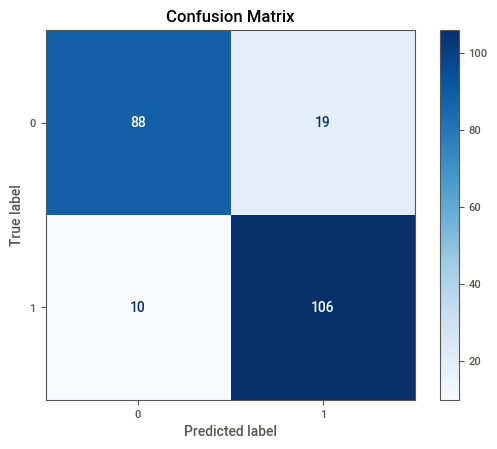

In [63]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_LR)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [64]:
print(classification_report(y_test, y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       107
           1       0.85      0.91      0.88       116

    accuracy                           0.87       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.87      0.87      0.87       223



In [65]:
# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_test_pred_LR)
print(f"➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_test_pred_LR)
print(f"➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_test_pred_LR)
print(f"➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_LR = roc_auc_score(y_test, y_test_pred_LR)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_LR * 100 : .2f} %\n")

➤➤➤ Precision Score :  84.80 %

➤➤➤ Recall Score :  91.38 %

➤➤➤ F1 Score :  87.97 %

➤➤➤ ROC_AUC :  86.81 %



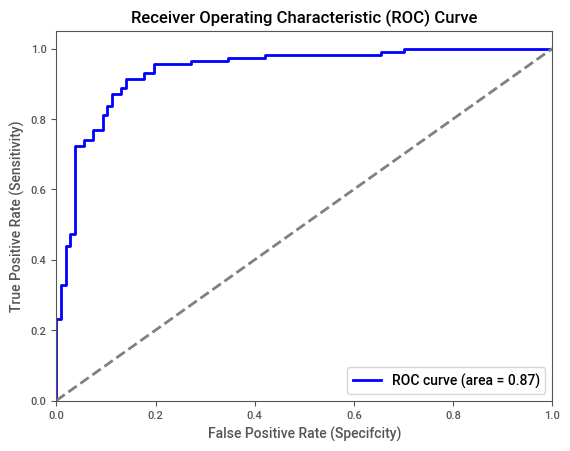

In [66]:
# Compute ROC curve

y_pred_prob = Model_LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_LR:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Execution Time Of Model: 0.0 Seconds



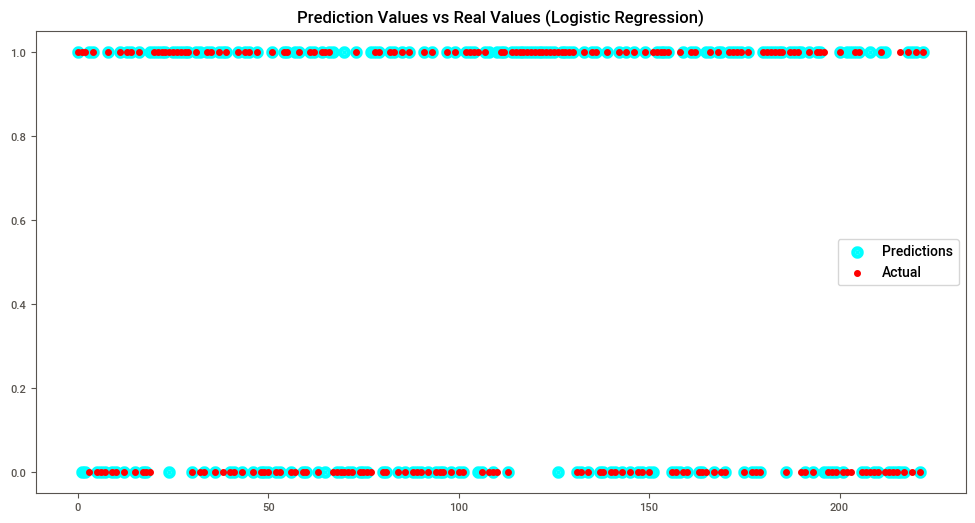

In [67]:
Start = time.time()
End = time.time()
Model_LR_Time = End - Start
print(f"Execution Time Of Model: {round((Model_LR_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test_pred_LR)), y_test_pred_LR, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_test)), y_test, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Logistic Regression)")
plt.legend()
plt.show()

**2. Applying "k-Nearest Neighbors (k-NN)" Algorithm**

In [68]:
Model_KNN = KNeighborsClassifier(n_neighbors=3)
Model_KNN.fit(X_train, y_train)
y_train_pred_KNN = Model_KNN.predict(X_train)
y_test_pred_KNN = Model_KNN.predict(X_test)

# Quick evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_KNN)
Test_Accuracy_KNN = accuracy_score(y_test, y_test_pred_KNN)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_KNN*100:.2f} %")

Training Accuracy: 99.73 %
Testing Accuracy: 98.21 %


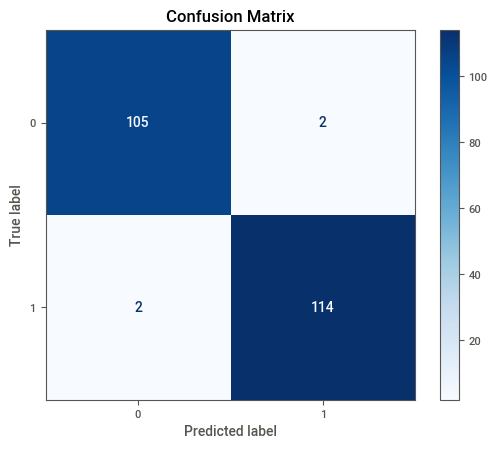

In [69]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_KNN)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [70]:
print(classification_report(y_test, y_test_pred_KNN))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.98      0.98      0.98       116

    accuracy                           0.98       223
   macro avg       0.98      0.98      0.98       223
weighted avg       0.98      0.98      0.98       223



In [71]:
# Precision = TP / (TP + FP)
Precision_KNN = precision_score(y_test, y_test_pred_KNN)
print(f"➤➤➤ Precision Score : {Precision_KNN * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_KNN = recall_score(y_test, y_test_pred_KNN)
print(f"➤➤➤ Recall Score : {Recall_KNN * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_KNN = f1_score(y_test, y_test_pred_KNN)
print(f"➤➤➤ F1 Score : {F1_Score_KNN * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_KNN = roc_auc_score(y_test, y_test_pred_KNN)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_KNN * 100 : .2f} %\n")

➤➤➤ Precision Score :  98.28 %

➤➤➤ Recall Score :  98.28 %

➤➤➤ F1 Score :  98.28 %

➤➤➤ ROC_AUC :  98.20 %



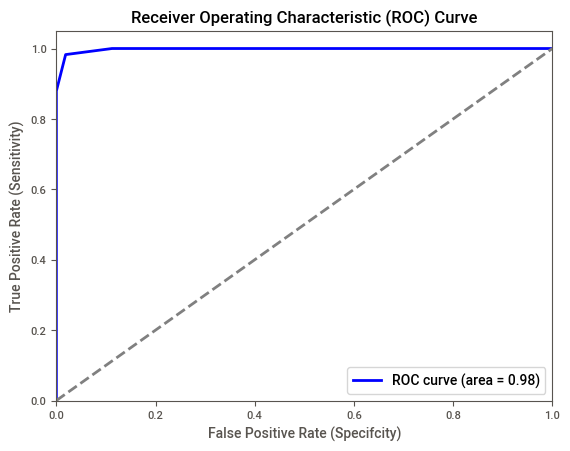

In [72]:
# Compute ROC curve

y_pred_prob = Model_KNN.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_KNN:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Execution Time Of Model: 0.0 Seconds



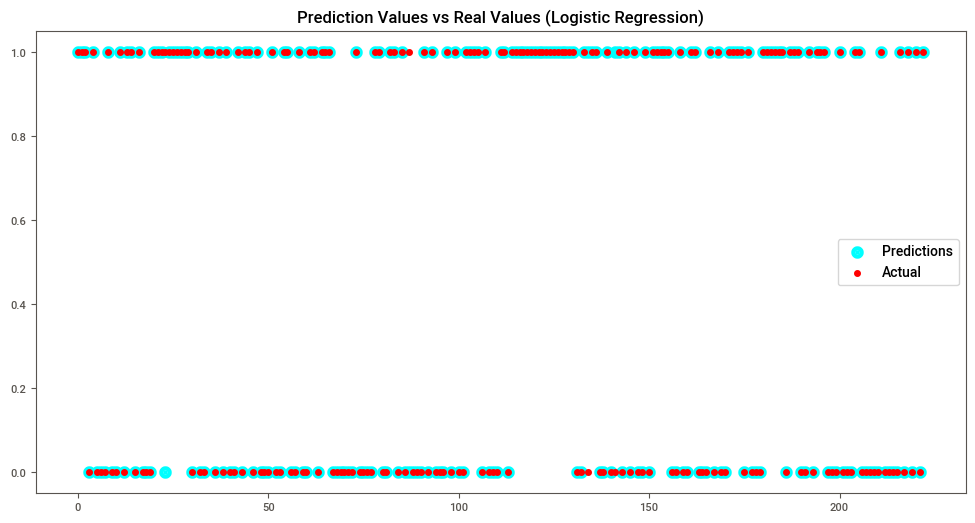

In [73]:
Start = time.time()
End = time.time()
Model_KNN_Time = End - Start
print(f"Execution Time Of Model: {round((Model_KNN_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test_pred_KNN)), y_test_pred_KNN, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_test)), y_test, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Logistic Regression)")
plt.legend()
plt.show()

**3. Applying "Support Vector Machines" Algorithm**

In [74]:
Model_SVC = SVC(kernel="linear")
Model_SVC.fit(X_train, y_train)
y_train_pred_SVC = Model_SVC.predict(X_train)
y_test_pred_SVC = Model_SVC.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_SVC)
Test_Accuracy_SVC = accuracy_score(y_test, y_test_pred_SVC)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_SVC*100:.2f} %")

Training Accuracy: 86.46 %
Testing Accuracy: 87.89 %


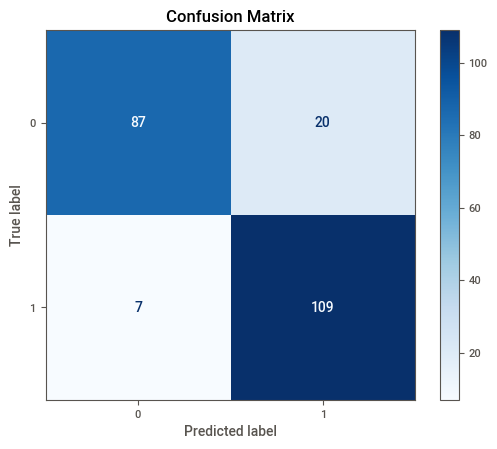

In [75]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_SVC)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [76]:
print(classification_report(y_test, y_test_pred_SVC))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       107
           1       0.84      0.94      0.89       116

    accuracy                           0.88       223
   macro avg       0.89      0.88      0.88       223
weighted avg       0.88      0.88      0.88       223



In [77]:
# Precision = TP / (TP + FP)
Precision_SVC = precision_score(y_test, y_test_pred_SVC)
print(f"➤➤➤ Precision Score : {Precision_SVC * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_SVC = recall_score(y_test, y_test_pred_SVC)
print(f"➤➤➤ Recall Score : {Recall_SVC * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_SVC = f1_score(y_test, y_test_pred_SVC)
print(f"➤➤➤ F1 Score : {F1_Score_SVC * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_SVC = roc_auc_score(y_test, y_test_pred_SVC)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_SVC * 100 : .2f} %\n")

➤➤➤ Precision Score :  84.50 %

➤➤➤ Recall Score :  93.97 %

➤➤➤ F1 Score :  88.98 %

➤➤➤ ROC_AUC :  87.64 %



In [78]:
# Predict Probability = False

Execution Time Of Model: 0.0 Seconds



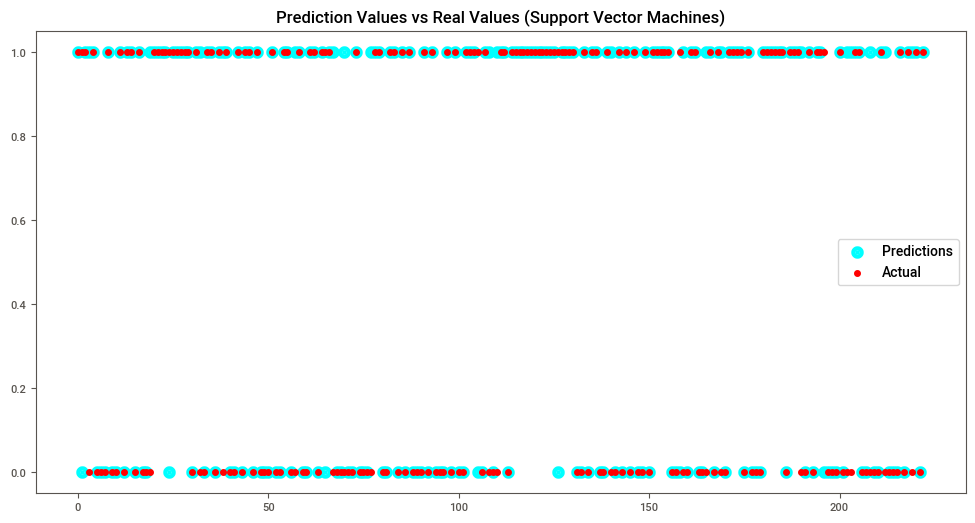

In [79]:
Start = time.time()
End = time.time()
Model_SVC_Time = End - Start
print(f"Execution Time Of Model: {round((Model_SVC_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test_pred_SVC)), y_test_pred_SVC, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_test)), y_test, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Support Vector Machines)")
plt.legend()
plt.show()

**4. Applying "Decision Trees" Algorithm**

In [80]:
Model_DT = DecisionTreeClassifier(random_state=42, max_depth=7)
Model_DT.fit(X_train, y_train)
y_train_pred_DT = Model_DT.predict(X_train)
y_test_pred_DT = Model_DT.predict(X_test)

# Quick evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_DT)
Test_Accuracy_DT = accuracy_score(y_test, y_test_pred_DT)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_DT*100:.2f} %")

Training Accuracy: 96.78 %
Testing Accuracy: 95.52 %


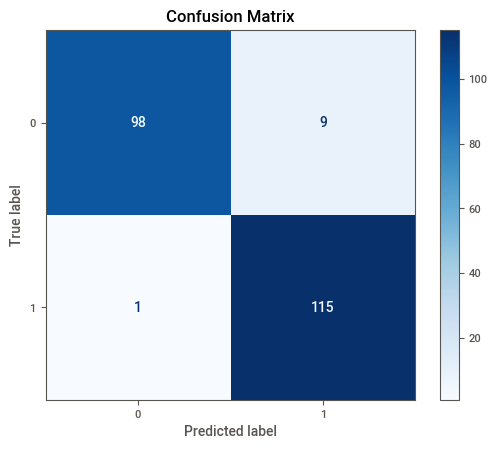

In [81]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_DT)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [82]:
print(classification_report(y_test, y_test_pred_DT))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       107
           1       0.93      0.99      0.96       116

    accuracy                           0.96       223
   macro avg       0.96      0.95      0.95       223
weighted avg       0.96      0.96      0.96       223



In [83]:
# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_test_pred_DT)
print(f"➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_test_pred_DT)
print(f"➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_test_pred_DT)
print(f"➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_DT = roc_auc_score(y_test, y_test_pred_DT)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_DT * 100 : .2f} %\n")

➤➤➤ Precision Score :  92.74 %

➤➤➤ Recall Score :  99.14 %

➤➤➤ F1 Score :  95.83 %

➤➤➤ ROC_AUC :  95.36 %



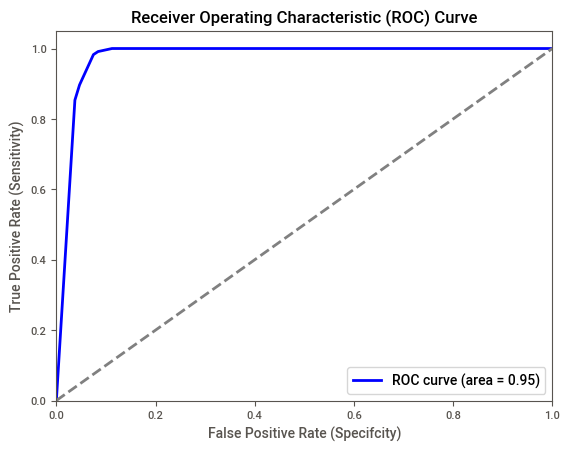

In [84]:
# Compute ROC curve

y_pred_prob = Model_DT.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_DT:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Execution Time Of Model: 0.0 Seconds



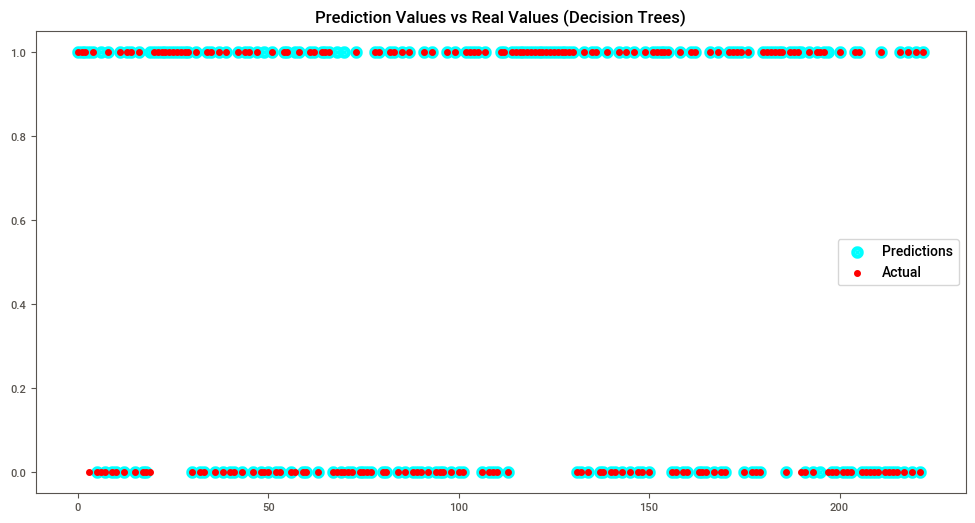

In [85]:
Start = time.time()
End = time.time()
Model_DT_Time = End - Start
print(f"Execution Time Of Model: {round((Model_DT_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test_pred_DT)), y_test_pred_DT, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_test)), y_test, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Decision Trees)")
plt.legend()
plt.show()

**5. Applying "Random Forests" Algorithm**

In [86]:
Model_RF = RandomForestClassifier(random_state=42, max_depth=6)
Model_RF.fit(X_train, y_train)
y_train_pred_RF = Model_RF.predict(X_train)
y_test_pred_RF = Model_RF.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_RF)
Test_Accuracy_RF = accuracy_score(y_test, y_test_pred_RF)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_RF*100:.2f} %")

Training Accuracy: 97.45 %
Testing Accuracy: 97.31 %


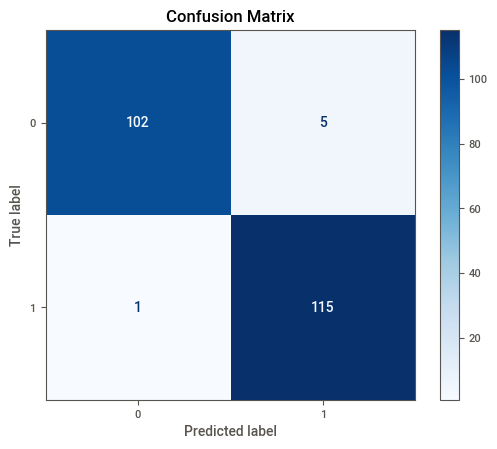

In [87]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_RF)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [88]:
print(classification_report(y_test, y_test_pred_RF))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.96      0.99      0.97       116

    accuracy                           0.97       223
   macro avg       0.97      0.97      0.97       223
weighted avg       0.97      0.97      0.97       223



In [89]:
# Precision = TP / (TP + FP)
Precision_RF = precision_score(y_test, y_test_pred_RF)
print(f"➤➤➤ Precision Score : {Precision_RF * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_RF = recall_score(y_test, y_test_pred_RF)
print(f"➤➤➤ Recall Score : {Recall_RF * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_RF = f1_score(y_test, y_test_pred_RF)
print(f"➤➤➤ F1 Score : {F1_Score_RF * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_RF = roc_auc_score(y_test, y_test_pred_RF)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_RF * 100 : .2f} %\n")

➤➤➤ Precision Score :  95.83 %

➤➤➤ Recall Score :  99.14 %

➤➤➤ F1 Score :  97.46 %

➤➤➤ ROC_AUC :  97.23 %



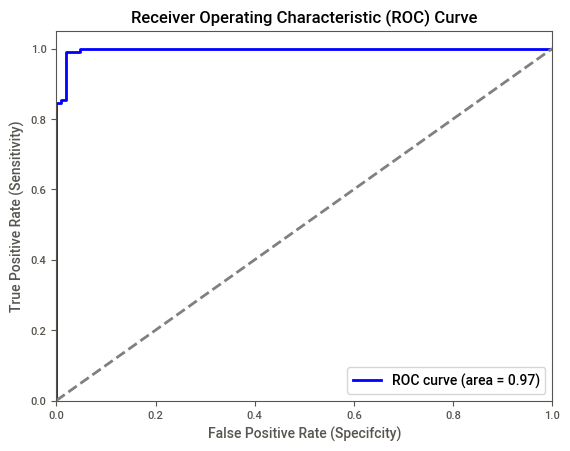

In [90]:
# Compute ROC curve

y_pred_prob = Model_RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_RF:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Execution Time Of Model: 0.0 Seconds



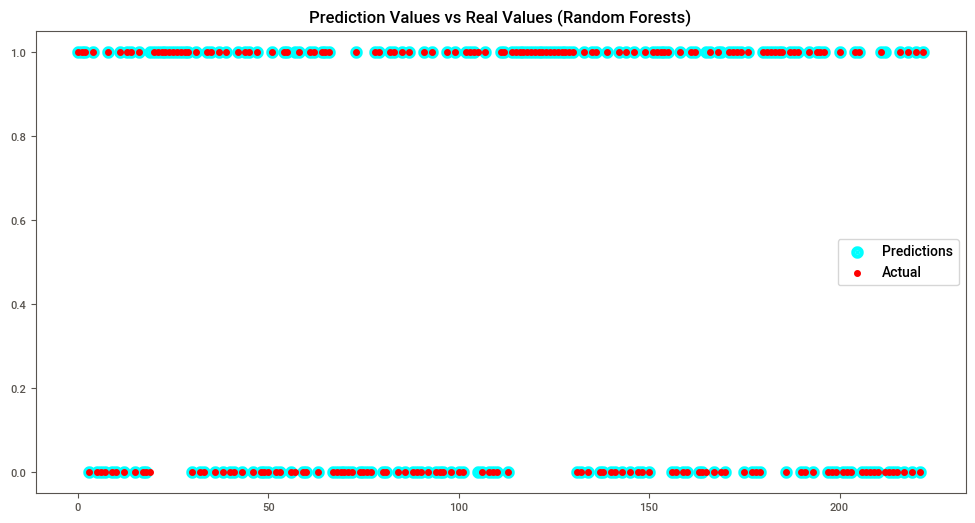

In [91]:
Start = time.time()
End = time.time()
Model_RF_Time = End - Start
print(f"Execution Time Of Model: {round((Model_RF_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test_pred_RF)), y_test_pred_RF, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_test)), y_test, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Random Forests)")
plt.legend()
plt.show()

**6. Applying "XGBoost" Algorithm**

In [92]:
Model_XGB = XGBClassifier(max_depth=3, learning_rate=0.02, n_estimators=50, objective='binary:logistic')
Model_XGB.fit(X_train, y_train)
y_train_pred_XGB = Model_XGB.predict(X_train)
y_test_pred_XGB = Model_XGB.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_XGB)
Test_Accuracy_XGB = accuracy_score(y_test, y_test_pred_XGB)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_XGB*100:.2f} %")

Training Accuracy: 89.14 %
Testing Accuracy: 88.79 %


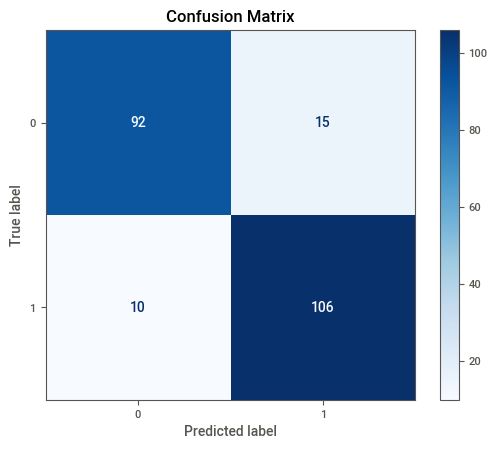

In [93]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_XGB)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [94]:
print(classification_report(y_test, y_test_pred_XGB))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       107
           1       0.88      0.91      0.89       116

    accuracy                           0.89       223
   macro avg       0.89      0.89      0.89       223
weighted avg       0.89      0.89      0.89       223



In [95]:
# Precision = TP / (TP + FP)
Precision_XGB = precision_score(y_test, y_test_pred_XGB)
print(f"➤➤➤ Precision Score : {Precision_XGB * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_XGB = recall_score(y_test, y_test_pred_XGB)
print(f"➤➤➤ Recall Score : {Recall_XGB * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_XGB = f1_score(y_test, y_test_pred_XGB)
print(f"➤➤➤ F1 Score : {F1_Score_XGB * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_XGB = roc_auc_score(y_test, y_test_pred_XGB)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_XGB * 100 : .2f} %\n")

➤➤➤ Precision Score :  87.60 %

➤➤➤ Recall Score :  91.38 %

➤➤➤ F1 Score :  89.45 %

➤➤➤ ROC_AUC :  88.68 %



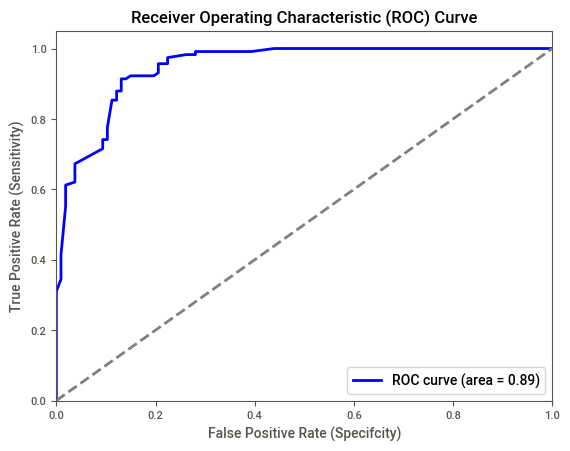

In [96]:
# Compute ROC curve

y_pred_prob = Model_XGB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_XGB:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Execution Time Of Model: 0.0 Seconds



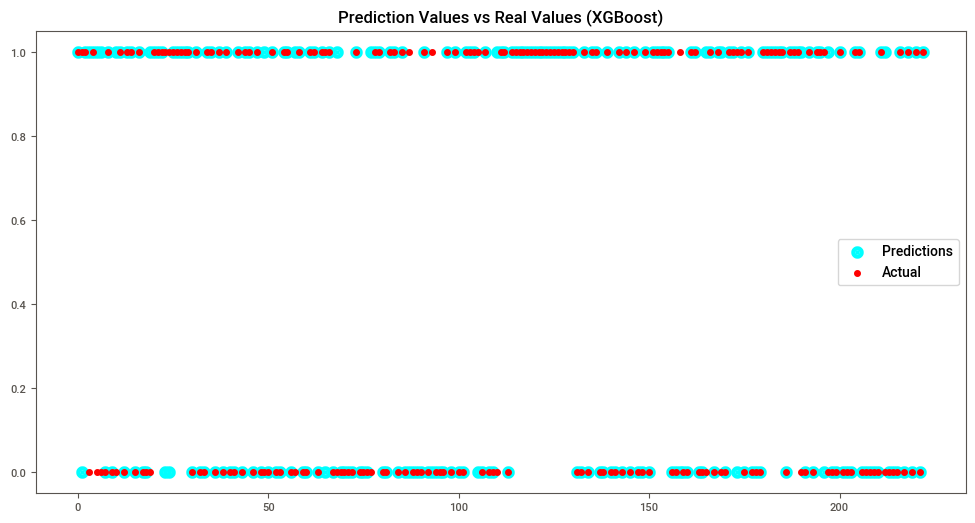

In [97]:
Start = time.time()
End = time.time()
Model_XGB_Time = End - Start
print(f"Execution Time Of Model: {round((Model_XGB_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test_pred_XGB)), y_test_pred_XGB, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_test)), y_test, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (XGBoost)")
plt.legend()
plt.show()

**7. Applying "Naive Bayes" Algorithm**

In [98]:
Model_NB = GaussianNB()
Model_NB.fit(X_train, y_train)
y_train_pred_NB = Model_NB.predict(X_train)
y_test_pred_NB = Model_NB.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_NB)
Test_Accuracy_NB = accuracy_score(y_test, y_test_pred_NB)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_NB*100:.2f} %")

Training Accuracy: 84.72 %
Testing Accuracy: 85.20 %


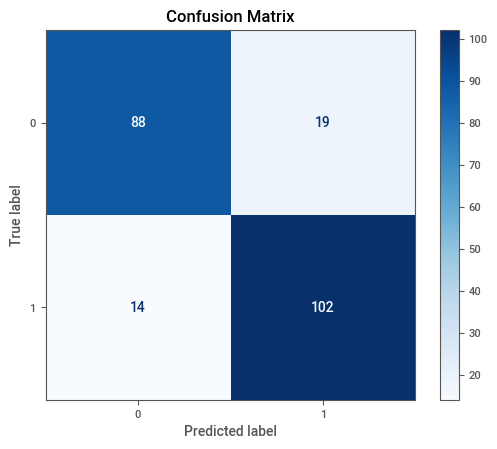

In [99]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [100]:
print(classification_report(y_test, y_test_pred_NB))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       107
           1       0.84      0.88      0.86       116

    accuracy                           0.85       223
   macro avg       0.85      0.85      0.85       223
weighted avg       0.85      0.85      0.85       223



In [101]:
# Precision = TP / (TP + FP)
Precision_NB = precision_score(y_test, y_test_pred_NB)
print(f"➤➤➤ Precision Score : {Precision_NB * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_NB = recall_score(y_test, y_test_pred_NB)
print(f"➤➤➤ Recall Score : {Recall_NB * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NB = f1_score(y_test, y_test_pred_NB)
print(f"➤➤➤ F1 Score : {F1_Score_NB * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_NB = roc_auc_score(y_test, y_test_pred_NB)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_NB * 100 : .2f} %\n")

➤➤➤ Precision Score :  84.30 %

➤➤➤ Recall Score :  87.93 %

➤➤➤ F1 Score :  86.08 %

➤➤➤ ROC_AUC :  85.09 %



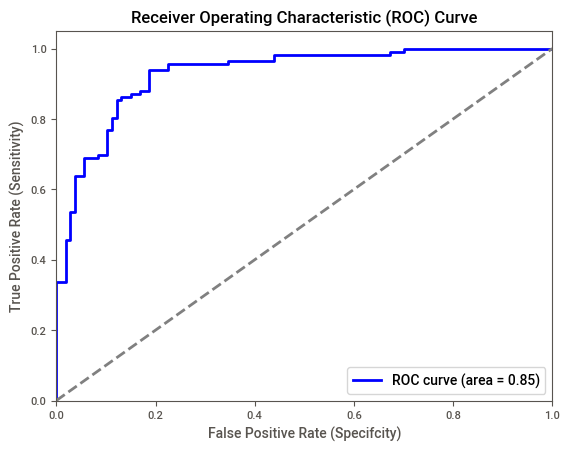

In [102]:
# Compute ROC curve

y_pred_prob = Model_NB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_NB:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Execution Time Of Model: 0.0 Seconds



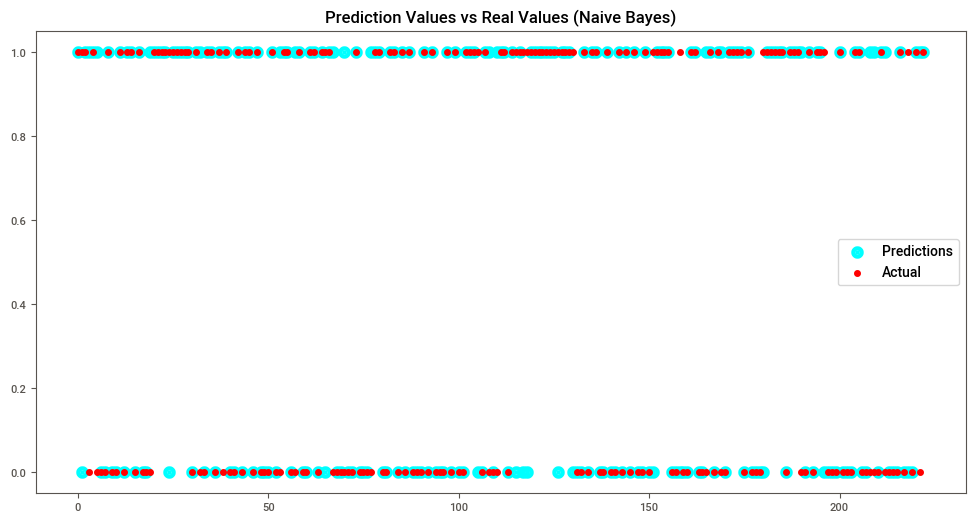

In [103]:
Start = time.time()
End = time.time()
Model_NB_Time = End - Start
print(f"Execution Time Of Model: {round((Model_NB_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test_pred_NB)), y_test_pred_NB, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_test)), y_test, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Naive Bayes)")
plt.legend()
plt.show()

<a id="8"></a>
# <font size= '6' color='DodgerBlue'>▶ Models Test Scores & Evaluation</font>

In [104]:
Models = pd.DataFrame({"Model": ["Logistic Regression","KNN", "SVM", "Decision Trees", 
                                 "Random Forests", "XGBoost", "Naive Bayes"],
                       
                       "Score": [(Test_Accuracy_LR * 100), (Test_Accuracy_KNN * 100), 
                                 (Test_Accuracy_SVC * 100), (Test_Accuracy_DT * 100), 
                                 (Test_Accuracy_RF * 100), (Test_Accuracy_XGB * 100), 
                                 (Test_Accuracy_NB * 100)]})

Models.sort_values(by="Score", ascending=False).style.background_gradient(cmap="Blues")

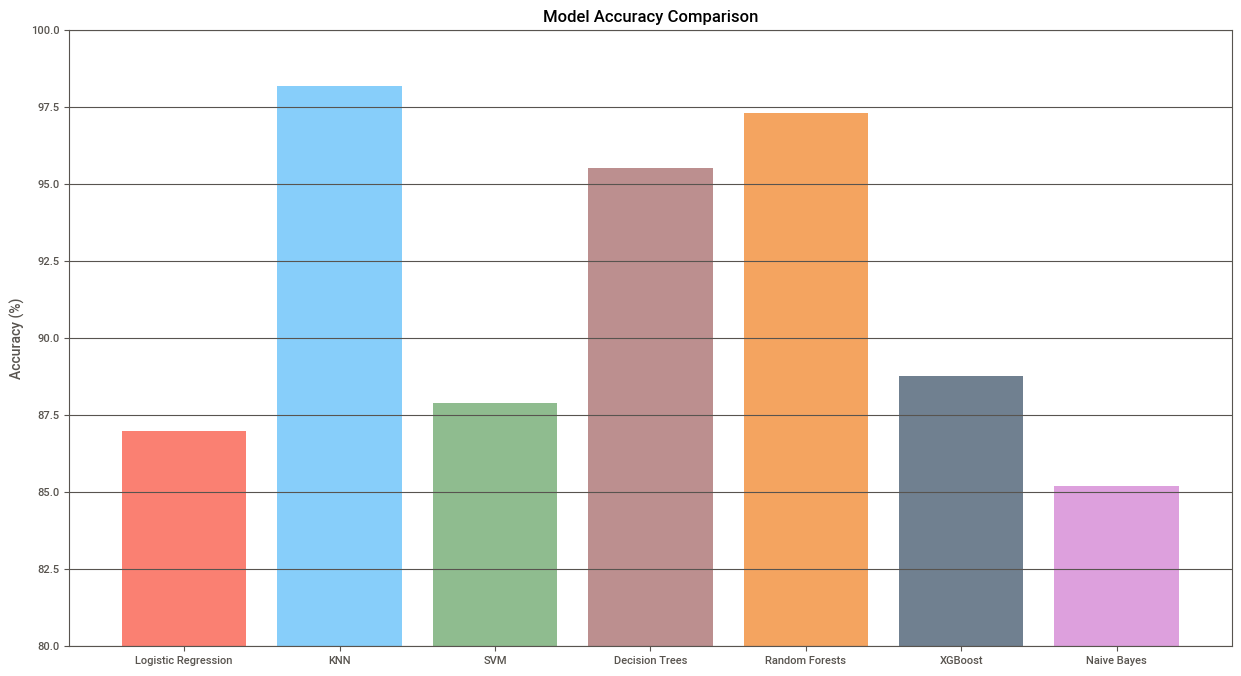

In [105]:
Classifiers = ["Logistic Regression","KNN", "SVM", "Decision Trees", "Random Forests", 
               "XGBoost", "Naive Bayes"]

Accuracies = [(Test_Accuracy_LR * 100), (Test_Accuracy_KNN * 100), (Test_Accuracy_SVC * 100), 
              (Test_Accuracy_DT * 100),(Test_Accuracy_RF * 100), (Test_Accuracy_XGB * 100), 
              (Test_Accuracy_NB * 100)]

plt.figure(figsize=(15, 8))

plt.bar(Classifiers, Accuracies, color=["Salmon", "LightSkyBlue", "DarkSeaGreen", 
                                        "RosyBrown", "SandyBrown", "SlateGray", "Plum"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(80, 100)
plt.grid(axis="y", alpha=1)
plt.show()

<center><img src="https://cdn.dribbble.com/users/126069/screenshots/2253470/screengif7.gif" style='width: 10%:'></center>